# World Disaster Risk Analysis 

In [10]:
#!conda install geopandas -y

In [81]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
#plots.style.use('fivethirtyeight')

import math as mt
from scipy.stats import norm
import seaborn as sns

import plotly.express as p
import plotly.graph_objects as go
import geopandas as gpd

## Data Cleaning

In [123]:
folder_path = 'Data/WorldRiskIndex2024/' #using a new wri dataset with more complete data & year 2024

years = list(range(2000, 2025))  
columns_to_keep = ['Country', 'ISO3', 'W', 'E', 'V', 'S', 'C', 'A']

combined_df = pd.DataFrame()

# Loop through each year, construct file names, and process the data
for year in years:
    filename = f'worldriskindex-{year}.csv' 
    file_path = folder_path + filename  
    
    df = pd.read_csv(file_path)
    
    if 'WRI.Country' in df.columns:
        df = df.rename(columns={
            'WRI.Country': 'Country',  
            'ISO3.Code': 'ISO3'      
        })
    df = df[columns_to_keep]
    df['Year'] = year  
    
    combined_df = pd.concat([combined_df, df], ignore_index=True)

wri = combined_df
wri

Country ISO3      W      E      V      S      C      A  Year
0     Afghanistan  AFG   4.19   0.25  70.32  61.91  78.59  71.47  2000
1         Albania  ALB   6.53   2.38  17.94  12.58  44.15  10.40  2000
2         Algeria  DZA  10.29   2.65  39.94  30.07  51.99  40.76  2000
3         Andorra  AND   0.32   0.02   5.21   2.58   2.18  25.10  2000
4          Angola  AGO  11.06   2.18  56.09  35.52  65.02  76.41  2000
...           ...  ...    ...    ...    ...    ...    ...    ...   ...
4820      Vanuatu  VUT  11.58   5.80  23.12  17.84  12.18  56.86  2024
4821     Viet Nam  VNM  24.24  26.73  21.98  20.35  12.38  42.13  2024
4822        Yemen  YEM  24.47   9.12  65.64  60.55  69.80  66.92  2024
4823       Zambia  ZMB   2.93   0.28  30.75  34.10  13.58  62.81  2024
4824     Zimbabwe  ZWE   2.62   0.20  34.23  41.90  14.07  68.01  2024

[4825 rows x 9 columns]

In [124]:
wri = wri.rename(columns={
    'W': 'WRI',
    'E': 'Exposure',
    'V': 'Vulnerability',
    'S': 'Susceptibility',
    'C': 'Lack of Coping Capabilities',
    'A': 'Lack of Adaptive Capacities',
})

__Check No Missing Values & Duplicates:__

In [125]:
wri[wri.isnull().any(axis=1)]

Empty DataFrame
Columns: [Country, ISO3, WRI, Exposure, Vulnerability, Susceptibility, Lack of Coping Capabilities, Lack of Adaptive Capacities, Year]
Index: []

In [126]:
wri[wri.duplicated()]

Empty DataFrame
Columns: [Country, ISO3, WRI, Exposure, Vulnerability, Susceptibility, Lack of Coping Capabilities, Lack of Adaptive Capacities, Year]
Index: []

In [127]:
#countries.head()
countries = pd.read_csv('Data/Countries.csv')
df = pd.merge(wri, countries, how='left', on='Country')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4825 entries, 0 to 4824
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      4825 non-null   object 
 1   ISO3                         4825 non-null   object 
 2   WRI                          4825 non-null   float64
 3   Exposure                     4825 non-null   float64
 4   Vulnerability                4825 non-null   float64
 5   Susceptibility               4825 non-null   float64
 6   Lack of Coping Capabilities  4825 non-null   float64
 7   Lack of Adaptive Capacities  4825 non-null   float64
 8   Year                         4825 non-null   int64  
 9   Code                         4500 non-null   object 
 10  Continent                    4500 non-null   object 
 11  Region                       4500 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 490.0+ KB


In [128]:
df = pd.merge(wri, countries[['Code', 'Continent', 'Region']], how='left', left_on='ISO3', right_on='Code')
df = df.drop(columns=['Code'])
df.head()

Country ISO3    WRI  Exposure  Vulnerability  Susceptibility  \
0  Afghanistan  AFG   4.19      0.25          70.32           61.91   
1      Albania  ALB   6.53      2.38          17.94           12.58   
2      Algeria  DZA  10.29      2.65          39.94           30.07   
3      Andorra  AND   0.32      0.02           5.21            2.58   
4       Angola  AGO  11.06      2.18          56.09           35.52   

   Lack of Coping Capabilities  Lack of Adaptive Capacities  Year Continent  \
0                        78.59                        71.47  2000      Asia   
1                        44.15                        10.40  2000    Europe   
2                        51.99                        40.76  2000    Africa   
3                         2.18                        25.10  2000    Europe   
4                        65.02                        76.41  2000    Africa   

            Region  
0    Southern Asia  
1  Southern Europe  
2  Northern Africa  
3  Southern Europe  
4    Middle Africa

In [129]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Country, ISO3, WRI, Exposure, Vulnerability, Susceptibility, Lack of Coping Capabilities, Lack of Adaptive Capacities, Year, Continent, Region]
Index: []

In [130]:
len(df['Continent'])

4825

There are indeed no nulls in the Continent column.

In [131]:
wri = df
wri.head()

Country ISO3    WRI  Exposure  Vulnerability  Susceptibility  \
0  Afghanistan  AFG   4.19      0.25          70.32           61.91   
1      Albania  ALB   6.53      2.38          17.94           12.58   
2      Algeria  DZA  10.29      2.65          39.94           30.07   
3      Andorra  AND   0.32      0.02           5.21            2.58   
4       Angola  AGO  11.06      2.18          56.09           35.52   

   Lack of Coping Capabilities  Lack of Adaptive Capacities  Year Continent  \
0                        78.59                        71.47  2000      Asia   
1                        44.15                        10.40  2000    Europe   
2                        51.99                        40.76  2000    Africa   
3                         2.18                        25.10  2000    Europe   
4                        65.02                        76.41  2000    Africa   

            Region  
0    Southern Asia  
1  Southern Europe  
2  Northern Africa  
3  Southern Europe  
4    Middle Africa

In [132]:
wri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4825 entries, 0 to 4824
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      4825 non-null   object 
 1   ISO3                         4825 non-null   object 
 2   WRI                          4825 non-null   float64
 3   Exposure                     4825 non-null   float64
 4   Vulnerability                4825 non-null   float64
 5   Susceptibility               4825 non-null   float64
 6   Lack of Coping Capabilities  4825 non-null   float64
 7   Lack of Adaptive Capacities  4825 non-null   float64
 8   Year                         4825 non-null   int64  
 9   Continent                    4825 non-null   object 
 10  Region                       4825 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 452.3+ KB


### GNI per capita, PPP (current international $)

This indicator provides per capita values for gross national income (GNI. Formerly GNP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. 

GNI is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. PPP conversion factor is a spatial price deflator and currency converter that eliminates the effects of the differences in price levels between countries.

source: https://data.worldbank.org/indicator/NY.GNP.PCAP.PP.CD

In [133]:
ppp = pd.read_csv('Data/ppp.csv', skiprows=4) 
years_to_keep = [str(year) for year in range(2000, 2024)]
ppp = ppp[['Country Name', 'Country Code'] + years_to_keep]
ppp.head()

Country Name Country Code          2000          2001  \
0                        Aruba          ABW  30320.000000  31210.000000   
1  Africa Eastern and Southern          AFE   2050.097657   2117.300074   
2                  Afghanistan          AFG    810.000000    770.000000   
3   Africa Western and Central          AFW           NaN           NaN   
4                       Angola          AGO   2790.000000   2910.000000   

           2002          2003          2004          2005          2006  \
0  29780.000000  31810.000000  34480.000000  28910.000000  35760.000000   
1   2186.855414   2251.790574   2380.318725   2539.083244   2715.268391   
2    960.000000    980.000000    980.000000   1090.000000   1140.000000   
3           NaN           NaN           NaN           NaN           NaN   
4   3380.000000   3470.000000   3780.000000   4310.000000   4730.000000   

           2007  ...          2014         2015          2016          2017  \
0  33470.000000  ...  35410.000000  35660.00000  35750.000000  36560.000000   
1   2881.130232  ...   3351.916096   3388.75599   3502.798136   3531.130759   
2   1300.000000  ...   2240.000000   2300.00000   2250.000000   2360.000000   
3           NaN  ...   4022.993044   4014.43247   3979.757115   4015.580187   
4   5350.000000  ...   7510.000000   6760.00000   6490.000000   6570.000000   

           2018          2019          2020          2021          2022  \
0  37730.000000  38310.000000  29630.000000  37070.000000  43670.000000   
1   3584.229869   3668.187802   3575.826645   3863.004386   4180.350280   
2   2470.000000   2630.000000   2590.000000   2150.000000   2100.000000   
3   4140.938693   4398.642528   4421.156379   4613.383747   4979.901737   
4   6790.000000   6850.000000   5880.000000   6810.000000   7320.000000   

          2023  
0          NaN  
1  4355.819919  
2          NaN  
3  5239.787316  
4  7310.000000  

[5 rows x 26 columns]

In [134]:
ppp_long = ppp.melt(id_vars=['Country Name', 'Country Code'], 
                    var_name='Year', 
                    value_name='PPP')

ppp_long.rename(columns={'Country Code': 'ISO3'}, inplace=True)
#Take a look at the PPP data for one country, note that 2023 is null
ppp_long[ppp_long['ISO3'] == 'ABW']
#ppp_long.head()


Country Name ISO3  Year      PPP
0           Aruba  ABW  2000  30320.0
266         Aruba  ABW  2001  31210.0
532         Aruba  ABW  2002  29780.0
798         Aruba  ABW  2003  31810.0
1064        Aruba  ABW  2004  34480.0
1330        Aruba  ABW  2005  28910.0
1596        Aruba  ABW  2006  35760.0
1862        Aruba  ABW  2007  33470.0
2128        Aruba  ABW  2008  38420.0
2394        Aruba  ABW  2009  33950.0
2660        Aruba  ABW  2010  32280.0
2926        Aruba  ABW  2011  32440.0
3192        Aruba  ABW  2012  33220.0
3458        Aruba  ABW  2013  34660.0
3724        Aruba  ABW  2014  35410.0
3990        Aruba  ABW  2015  35660.0
4256        Aruba  ABW  2016  35750.0
4522        Aruba  ABW  2017  36560.0
4788        Aruba  ABW  2018  37730.0
5054        Aruba  ABW  2019  38310.0
5320        Aruba  ABW  2020  29630.0
5586        Aruba  ABW  2021  37070.0
5852        Aruba  ABW  2022  43670.0
6118        Aruba  ABW  2023      NaN

In [135]:
#Verify that most countries have 2023 data, but some don't
ppp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2000          234 non-null    float64
 3   2001          234 non-null    float64
 4   2002          234 non-null    float64
 5   2003          234 non-null    float64
 6   2004          234 non-null    float64
 7   2005          235 non-null    float64
 8   2006          235 non-null    float64
 9   2007          235 non-null    float64
 10  2008          240 non-null    float64
 11  2009          241 non-null    float64
 12  2010          243 non-null    float64
 13  2011          244 non-null    float64
 14  2012          242 non-null    float64
 15  2013          243 non-null    float64
 16  2014          243 non-null    float64
 17  2015          243 non-null    float64
 18  2016          242 non-null    

We will create 2 wri datasets to use in our analysis later:

1. wri_ppp: contains data for all years 2000-2023 with nulls removed. 
2. wri_2024: contains 2024 WRI data only, and the most recent PPP value (2023 or 2022)

In [136]:
### wri_ppp: ppp for all years 2000-2023 with nulls removed. 

ppp_long['Year'] = ppp_long['Year'].astype(int)

wri_ppp = pd.merge(wri, ppp_long, how='left', on=['ISO3', 'Year'])
wri_ppp = wri_ppp.dropna(subset=['PPP'])

wri_ppp.head()


Country ISO3    WRI  Exposure  Vulnerability  Susceptibility  \
0          Afghanistan  AFG   4.19      0.25          70.32           61.91   
1              Albania  ALB   6.53      2.38          17.94           12.58   
2              Algeria  DZA  10.29      2.65          39.94           30.07   
4               Angola  AGO  11.06      2.18          56.09           35.52   
5  Antigua and Barbuda  ATG   4.25      1.21          14.95           11.38   

   Lack of Coping Capabilities  Lack of Adaptive Capacities  Year  \
0                        78.59                        71.47  2000   
1                        44.15                        10.40  2000   
2                        51.99                        40.76  2000   
4                        65.02                        76.41  2000   
5                         9.83                        29.87  2000   

       Continent           Region         Country Name      PPP  
0           Asia    Southern Asia          Afghanistan    810.0  
1         Europe  Southern Europe              Albania   3980.0  
2         Africa  Northern Africa              Algeria   8800.0  
4         Africa    Middle Africa               Angola   2790.0  
5  North America        Caribbean  Antigua and Barbuda  18240.0

In [137]:
wri_ppp[wri_ppp.isnull().any(axis=1)]

Empty DataFrame
Columns: [Country, ISO3, WRI, Exposure, Vulnerability, Susceptibility, Lack of Coping Capabilities, Lack of Adaptive Capacities, Year, Continent, Region, Country Name, PPP]
Index: []

In [138]:
### wri_2024: use WRI data for 2024 only, and the most recent ppp value (2023 or 2022)

#sort by ppp and drop the null values
ppp_long_sorted = ppp_long.sort_values(by=['ISO3', 'Year'], ascending=[True, False])

ppp_long_sorted = ppp_long_sorted.dropna(subset=['PPP'])
ppp_long_sorted

Country Name ISO3  Year      PPP
5852        Aruba  ABW  2022  43670.0
5586        Aruba  ABW  2021  37070.0
5320        Aruba  ABW  2020  29630.0
5054        Aruba  ABW  2019  38310.0
4788        Aruba  ABW  2018  37730.0
...           ...  ...   ...      ...
1329     Zimbabwe  ZWE  2004   1370.0
1063     Zimbabwe  ZWE  2003   1500.0
797      Zimbabwe  ZWE  2002   1750.0
531      Zimbabwe  ZWE  2001   1840.0
265      Zimbabwe  ZWE  2000   1740.0

[5748 rows x 4 columns]

In [139]:
#drop the duplicates to use the most recent PPP
ppp_most_recent = ppp_long_sorted.drop_duplicates(subset=['ISO3'], keep='first')
#confirm that all countries has a valid ppp data
ppp_most_recent[ppp_most_recent.isnull().any(axis=1)]

Empty DataFrame
Columns: [Country Name, ISO3, Year, PPP]
Index: []

In [140]:
#Check to see the oldest data used
ppp_most_recent.sort_values(by='Year', ascending=True).head(10)

Country Name ISO3  Year      PPP
1953             Greenland  GRL  2007  40270.0
2995               Eritrea  ERI  2011   1610.0
3180         Venezuela, RB  VEN  2011  16960.0
3720           Yemen, Rep.  YEM  2013   3280.0
4206           South Sudan  SSD  2015   1010.0
5289          Turkmenistan  TKM  2019  16860.0
5798            San Marino  SMR  2021  59020.0
5813  Syrian Arab Republic  SYR  2021   2780.0
5903               Curacao  CUW  2022  29470.0
5884                Bhutan  BTN  2022  14240.0

**Dropping the countries that use 2007 to 2021 PPP data to avoid bias.** 

In [141]:
countries = ['GRL', 'ERI', 'RB', 'VEN', 'YEM', 'SSD', 'TKM', 'SMR','SYR']

ppp_most_recent = ppp_most_recent[~ppp_most_recent['ISO3'].isin(countries)]
ppp_most_recent.head()

Country Name ISO3  Year           PPP
5852                        Aruba  ABW  2022  43670.000000
6119  Africa Eastern and Southern  AFE  2023   4355.819919
5854                  Afghanistan  AFG  2022   2100.000000
6121   Africa Western and Central  AFW  2023   5239.787316
6122                       Angola  AGO  2023   7310.000000

In [146]:
#use wri 2023 or wri 2024? or compare both
wri_2024 = wri[wri['Year'] == 2024]
ppp_most_recent.drop(columns=['Year','Country Name'], inplace=True)

wri_2024 = pd.merge(wri_2024, ppp_most_recent, how='left', on=['ISO3'])
wri_2024.head()

Country ISO3    WRI  Exposure  Vulnerability  Susceptibility  \
0  Afghanistan  AFG   4.12      0.25          67.77           56.66   
1      Albania  ALB   6.24      2.29          17.01           11.61   
2      Algeria  DZA   9.64      2.62          35.49           18.12   
3      Andorra  AND   0.28      0.02           3.96            2.63   
4       Angola  AGO  10.42      2.37          45.83           25.01   

   Lack of Coping Capabilities  Lack of Adaptive Capacities  Year Continent  \
0                        78.94                        69.60  2024      Asia   
1                        11.10                        38.18  2024    Europe   
2                        49.06                        50.28  2024    Africa   
3                         1.86                        12.66  2024    Europe   
4                        56.87                        67.70  2024    Africa   

            Region      PPP  
0    Southern Asia   2100.0  
1  Southern Europe  21110.0  
2  Northern Africa  16790.0  
3  Southern Europe  75090.0  
4    Middle Africa   7310.0

In [147]:
wri_2024[wri_2024.isnull().any(axis=1)]

Country ISO3    WRI  Exposure  \
20        Bolivarian Republic of Venezuela  VEN  24.20     19.52   
41                                    Cuba  CUB   7.80      4.57   
44   Democratic People's Republic of Korea  PRK  12.38      7.22   
54                                 Eritrea  ERI   7.47      2.30   
98                           Liechtenstein  LIE   0.71      0.09   
111                                 Monaco  MCO   0.18      0.02   
149                             San Marino  SMR   0.35      0.03   
162                            South Sudan  SSD   4.25      0.25   
169                   Syrian Arab Republic  SYR  12.50      2.53   
178                           Turkmenistan  TKM   1.25      0.17   
190                                  Yemen  YEM  24.47      9.12   

     Vulnerability  Susceptibility  Lack of Coping Capabilities  \
20           30.01           29.57                        14.43   
41           13.31           13.12                        10.24   
44           21.23           11.04                        13.83   
54           24.26           18.30                        14.67   
98            5.64            6.50                         0.99   
111           1.57            1.68                         0.44   
149           4.11            2.74                         1.31   
162          72.39           71.48                        69.34   
169          61.80           49.54                        72.97   
178           9.14            9.11                         3.08   
190          65.64           60.55                        69.80   

     Lack of Adaptive Capacities  Year      Continent           Region  PPP  
20                         63.36  2024  South America    South America  NaN  
41                         17.54  2024  North America        Caribbean  NaN  
44                         62.69  2024           Asia     Eastern Asia  NaN  
54                         53.20  2024         Africa   Eastern Africa  NaN  
98                         27.92  2024         Europe   Western Europe  NaN  
111                         5.25  2024         Europe   Western Europe  NaN  
149                        19.37  2024         Europe  Southern Europe  NaN  
162                        76.55  2024         Africa   Eastern Africa  NaN  
169                        65.30  2024           Asia     Western Asia  NaN  
178                        27.21  2024           Asia     Central Asia  NaN  
190                        66.92  2024           Asia     Western Asia  NaN

In [149]:
wri_2024 = wri_2024.dropna()
wri_2024.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 192
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      182 non-null    object 
 1   ISO3                         182 non-null    object 
 2   WRI                          182 non-null    float64
 3   Exposure                     182 non-null    float64
 4   Vulnerability                182 non-null    float64
 5   Susceptibility               182 non-null    float64
 6   Lack of Coping Capabilities  182 non-null    float64
 7   Lack of Adaptive Capacities  182 non-null    float64
 8   Year                         182 non-null    int64  
 9   Continent                    182 non-null    object 
 10  Region                       182 non-null    object 
 11  PPP                          182 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 18.5+ KB


### Gini Index 
Gini index measures the extent to which the distribution of income (or, in some cases, consumption expenditure) among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.

https://ourworldindata.org/grapher/economic-inequality-gini-index

In [150]:
gini = pd.read_csv('Data/gini.csv', skiprows=4) 
years_to_keep = [str(year) for year in range(2000, 2024)]
gini = gini[['Country Name', 'Country Code'] + years_to_keep]
gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2000          49 non-null     float64
 3   2001          39 non-null     float64
 4   2002          57 non-null     float64
 5   2003          59 non-null     float64
 6   2004          70 non-null     float64
 7   2005          75 non-null     float64
 8   2006          76 non-null     float64
 9   2007          68 non-null     float64
 10  2008          73 non-null     float64
 11  2009          78 non-null     float64
 12  2010          82 non-null     float64
 13  2011          78 non-null     float64
 14  2012          84 non-null     float64
 15  2013          75 non-null     float64
 16  2014          82 non-null     float64
 17  2015          85 non-null     float64
 18  2016          81 non-null     

In [151]:
gini.head(10)

Country Name Country Code  2000  2001  2002  2003  2004  \
0                        Aruba          ABW   NaN   NaN   NaN   NaN   NaN   
1  Africa Eastern and Southern          AFE   NaN   NaN   NaN   NaN   NaN   
2                  Afghanistan          AFG   NaN   NaN   NaN   NaN   NaN   
3   Africa Western and Central          AFW   NaN   NaN   NaN   NaN   NaN   
4                       Angola          AGO  51.9   NaN   NaN   NaN   NaN   
5                      Albania          ALB   NaN   NaN  31.7   NaN   NaN   
6                      Andorra          AND   NaN   NaN   NaN   NaN   NaN   
7                   Arab World          ARB   NaN   NaN   NaN   NaN   NaN   
8         United Arab Emirates          ARE   NaN   NaN   NaN   NaN   NaN   
9                    Argentina          ARG  51.0  53.3  53.8  51.0  48.5   

   2005  2006  2007  ...  2014  2015  2016  2017  2018  2019  2020  2021  \
0   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN  51.3   NaN   NaN   NaN   
5  30.6   NaN   NaN  ...  34.6  32.8  33.7  33.1  30.1  30.1  29.4   NaN   
6   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN  26.4   NaN   NaN   NaN   
9  47.8  46.4  46.3  ...  41.8   NaN  42.3  41.4  41.7  43.3  42.7  42.4   

   2022  2023  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN  
5   NaN   NaN  
6   NaN   NaN  
7   NaN   NaN  
8   NaN   NaN  
9  40.7   NaN  

[10 rows x 26 columns]

In [152]:
gini = gini.melt(id_vars=['Country Name', 'Country Code'], 
                    var_name='Year', 
                    value_name='Gini')

gini.rename(columns={'Country Code': 'ISO3'}, inplace=True)

In [153]:
gini = gini.dropna(subset=['Gini'])
gini

Country Name ISO3  Year  Gini
4          Angola  AGO  2000  51.9
9       Argentina  ARG  2000  51.0
14        Austria  AUT  2000  29.0
17        Belgium  BEL  2000  33.1
20     Bangladesh  BGD  2000  33.4
...           ...  ...   ...   ...
6116       Zambia  ZMB  2022  51.5
6166   Costa Rica  CRI  2023  46.7
6184      Ecuador  ECU  2023  44.6
6224    Indonesia  IDN  2023  36.1
6303       Panama  PAN  2023  48.9

[1625 rows x 4 columns]

In [156]:
gini_df_sorted = gini.sort_values(by=['ISO3', 'Year'], ascending=[True, False])
gini_most_recent = gini_df_sorted.drop_duplicates(subset=['ISO3'], keep='first')

gini_most_recent.reset_index(drop=True, inplace=True)

gini_most_recent=gini_most_recent[['ISO3', 'Year', 'Gini']]
gini_most_recent = gini_most_recent.rename(columns={'Year': 'Year_Gini'})

gini_most_recent

ISO3 Year_Gini  Gini
0    AGO      2018  51.3
1    ALB      2020  29.4
2    ARE      2018  26.4
3    ARG      2022  40.7
4    ARM      2022  27.9
..   ...       ...   ...
160  XKX      2017  29.0
161  YEM      2014  36.7
162  ZAF      2014  63.0
163  ZMB      2022  51.5
164  ZWE      2019  50.3

[165 rows x 3 columns]

Add the Gini Index to Wri_2024:

In [158]:
merged_df = pd.merge(wri_2024, gini_most_recent, how='left', on=['ISO3'])
#merged_df[merged_df.isnull().any(axis=1)]
merged_df.head()

Country ISO3    WRI  Exposure  Vulnerability  Susceptibility  \
0  Afghanistan  AFG   4.12      0.25          67.77           56.66   
1      Albania  ALB   6.24      2.29          17.01           11.61   
2      Algeria  DZA   9.64      2.62          35.49           18.12   
3      Andorra  AND   0.28      0.02           3.96            2.63   
4       Angola  AGO  10.42      2.37          45.83           25.01   

   Lack of Coping Capabilities  Lack of Adaptive Capacities  Year Continent  \
0                        78.94                        69.60  2024      Asia   
1                        11.10                        38.18  2024    Europe   
2                        49.06                        50.28  2024    Africa   
3                         1.86                        12.66  2024    Europe   
4                        56.87                        67.70  2024    Africa   

            Region      PPP Year_Gini  Gini  
0    Southern Asia   2100.0       NaN   NaN  
1  Southern Europe  21110.0      2020  29.4  
2  Northern Africa  16790.0      2011  27.6  
3  Southern Europe  75090.0       NaN   NaN  
4    Middle Africa   7310.0      2018  51.3

In [159]:
merged_df = merged_df.dropna(subset=['Gini'])
merged_df[merged_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Country, ISO3, WRI, Exposure, Vulnerability, Susceptibility, Lack of Coping Capabilities, Lack of Adaptive Capacities, Year, Continent, Region, PPP, Year_Gini, Gini]
Index: []

In [168]:
merged_df_sorted = merged_df.sort_values(by='Year_Gini', ascending=True)

merged_df_filtered = merged_df_sorted[merged_df_sorted['Year_Gini'] >= '2019']

merged_df_filtered.head()

Country ISO3   WRI  Exposure  Vulnerability  Susceptibility  \
170            Uganda  UGA  2.81      0.23          34.40           48.78   
120            Norway  NOR  2.61      1.06           6.42            2.19   
99           Maldives  MDV  1.11      0.11          11.12            9.52   
102  Marshall Islands  MHL  3.12      0.50          19.51           16.36   
103        Mauritania  MRT  9.32      2.91          29.85           29.75   

     Lack of Coping Capabilities  Lack of Adaptive Capacities  Year Continent  \
170                        13.94                        59.89  2024    Africa   
120                         4.88                        24.78  2024    Europe   
99                          9.89                        14.62  2024      Asia   
102                        10.36                        43.83  2024   Oceania   
103                        14.55                        61.47  2024    Africa   

              Region       PPP Year_Gini  Gini  
170   Eastern Africa    3040.0      2019  42.7  
120  Northern Europe  108790.0      2019  27.7  
99     Southern Asia   21720.0      2019  29.3  
102       Micronesia    8570.0      2019  35.5  
103   Western Africa    6930.0      2019  32.0

In [169]:
merged_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 170 to 74
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      107 non-null    object 
 1   ISO3                         107 non-null    object 
 2   WRI                          107 non-null    float64
 3   Exposure                     107 non-null    float64
 4   Vulnerability                107 non-null    float64
 5   Susceptibility               107 non-null    float64
 6   Lack of Coping Capabilities  107 non-null    float64
 7   Lack of Adaptive Capacities  107 non-null    float64
 8   Year                         107 non-null    int64  
 9   Continent                    107 non-null    object 
 10  Region                       107 non-null    object 
 11  PPP                          107 non-null    float64
 12  Year_Gini                    107 non-null    object 
 13  Gini               

In [170]:
wri_2024_gini = merged_df_filtered

We have imported and cleaned our datasets, making sure there are no null or duplicate values.

## Exploratory Data Analysis

### Background: 

The __WorldRiskIndex__ is a statistical model that provides an assessment of the latent risk of 193 countries falling victim to a humanitarian disaster caused by extreme natural events and the negative impacts of climate change. Based on peer-reviewed concepts of risk, hazard and vulnerability, it is assumed that __disaster risks are not solely shaped by the occurrence, intensity, and duration of extreme natural events, but that social factors, political conditions, and economic structures are equally responsible for whether disasters occur in the context of extreme natural events.__ Accordingly, both main spheres of disaster risk, exposure and vulnerability, are treated as equals.

Initially developed in 2011 by the United Nations University Institute for Environment and Human Security (UNU-EHS) and continuously refined by the Institute for International Law of Peace and Armed Conflict (IFHV) since 2018, the WorldRiskIndex links two key disaster risk factors: exposure to natural hazards like earthquakes, storms, and droughts, and societal capacities to respond to such events.

source: https://data.humdata.org/dataset/worldriskindex

### The Structure of the World Risk Index 

$$ \text{WRI} = \sqrt{\text{Exposure} \times \text{Vulnerability}} $$


Where: 
* Vulnerability is composed of Susceptibility, Lack of Coping Capabilities, and Lack of Adaptive Capacities. 

Each dimension is derived from a range of indicators. For instance, Susceptibility includes factors such as:

* Gross National Income and Savings per Capita
* Life Expectancy
* Gender Disparity
* Access to drinking water and sanitation
* Vulnerable populations, such as refugees and displaced persons

Overall, the World Risk Index incorporates 100 scientifically recognized indicators sourced from publicly accessible databases like the World Bank, UNESCO, and WHO.


source: https://repository.gheli.harvard.edu/repository/10930/
https://i.unu.edu/media/ehs.unu.edu/news/4070/11895.pdf

### Description of the data: 

* __Region:__ Name of the region.
* __WRI:__ World Risk Score of the region.
* __Exposure:__ Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea level rise.
* __Vulnerability:__ Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
* __Susceptibility:__ Susceptibility depending on infrastructure, nutrition, housing situation, and economic framework conditions.
* __Lack of Coping Capabilities:__ Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security.
* __Lack of Adaptive Capacities:__ Adaptive capacities related to coming natural events, climate change, and other challenges.
* __Year:__ Year data is being described.
* __WRI Category:__ WRI Category for the given WRI Score.
* __Exposure Category:__ Exposure Category for the given Exposure Score.
* __Vulnerability Category:__ Vulnerability Category for the given Vulnerability Score.
* __Susceptibility Category:__ Susceptibility Category for the given Susceptibility Score.

source:  https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset/data

In [171]:
#wri.describe()

In [172]:
quantitative_features = ['WRI', 'Exposure', 'Vulnerability', 'Susceptibility', 
                         'Lack of Coping Capabilities', 'Lack of Adaptive Capacities']

correlation_matrix = wri[quantitative_features].corr()

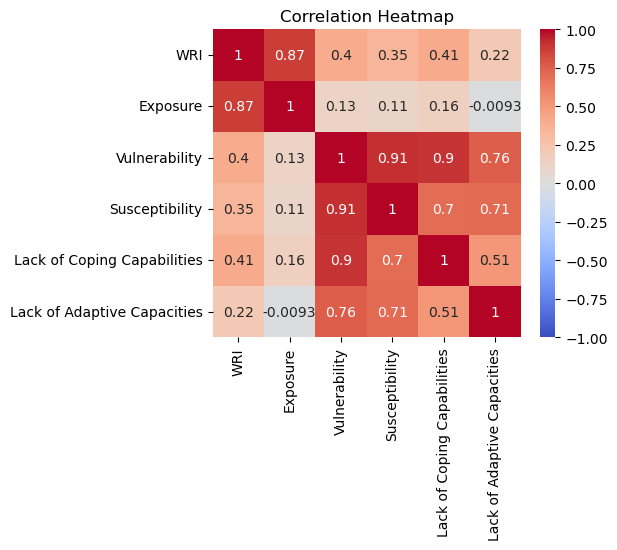

In [173]:
# Create the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Heatmap')
plt.show()

The World Risk Index methodology calculates a country's disaster risk by multiplying its "exposure" to natural hazards like earthquakes, floods, and cyclones with its "vulnerability," which is composed of three factors: susceptibility (structural conditions increasing disaster likelihood), coping capacity (ability to respond to a disaster), and adaptive capacity (long-term strategies to mitigate future risks), essentially assessing how well a society can handle the impacts of a natural disaster based on its social, economic, and environmental conditions; this provides a comprehensive picture of a country's potential for disaster damage from extreme natural events and climate change impacts.

https://i.unu.edu/media/ehs.unu.edu/news/4070/11895.pdf



Here, we're examining the relationships between the siz quantiative features in the dataset: WRI, Exposure, Vulnerability, Susceptibility, Lack of Coping Capabilities, and Lack of Adaptive Capacities. It tells us several important observations:

1. There is a very strong positive correlation between WRI and Exposure, while only a moderate positive correlation between WRI and Vulnerability.

2. Vulnerability is highly related to Susceptibility, Lack of Adaptive Capacities, and Lack of Coping Capabilities, which aligns with the methodology of how the vulnerability factor was calculated.   

3. The low positive correlation between Exposure and Vulnerability suggests that these two variables are relatively independent. Regions with high exposure do not necessarily have high vulnerability, and vice versa.



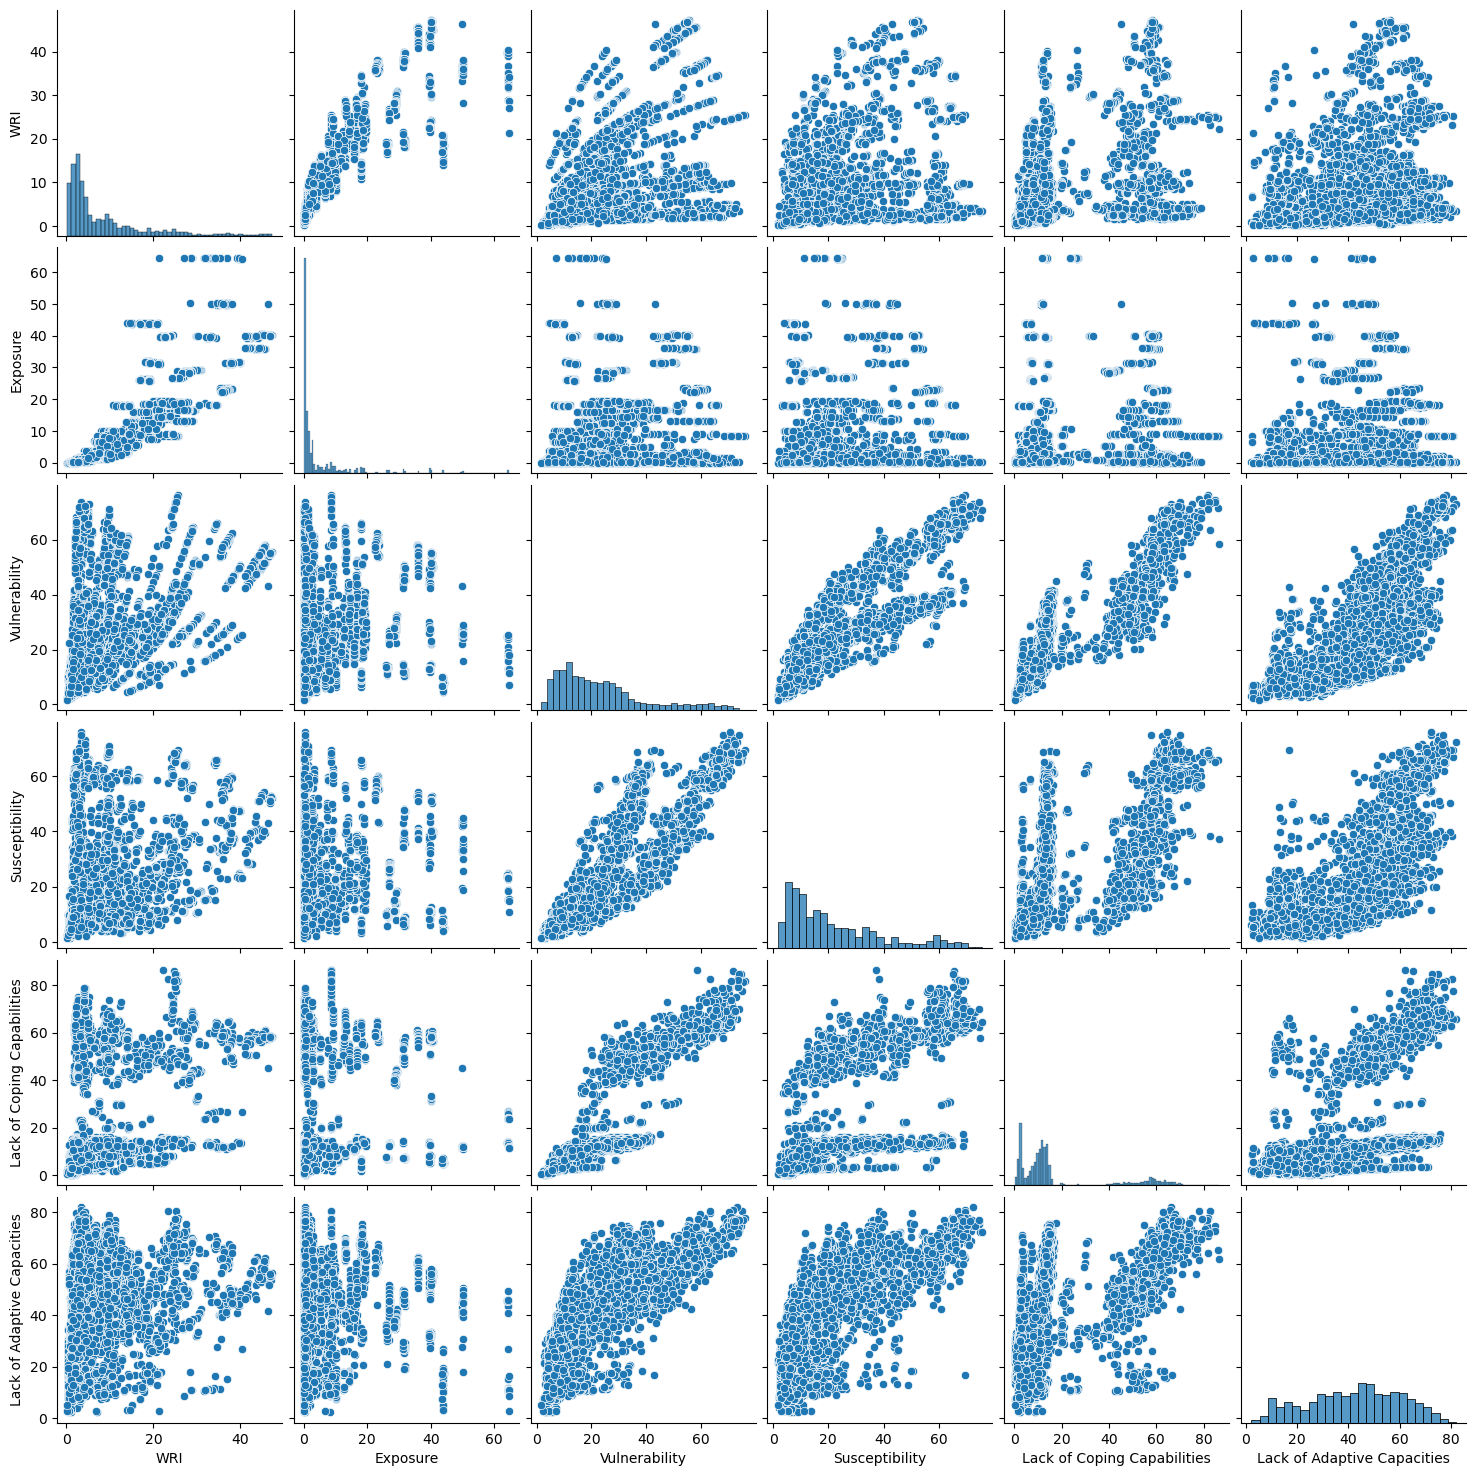

In [174]:
sns.pairplot(wri, vars = quantitative_features)
plt.show()

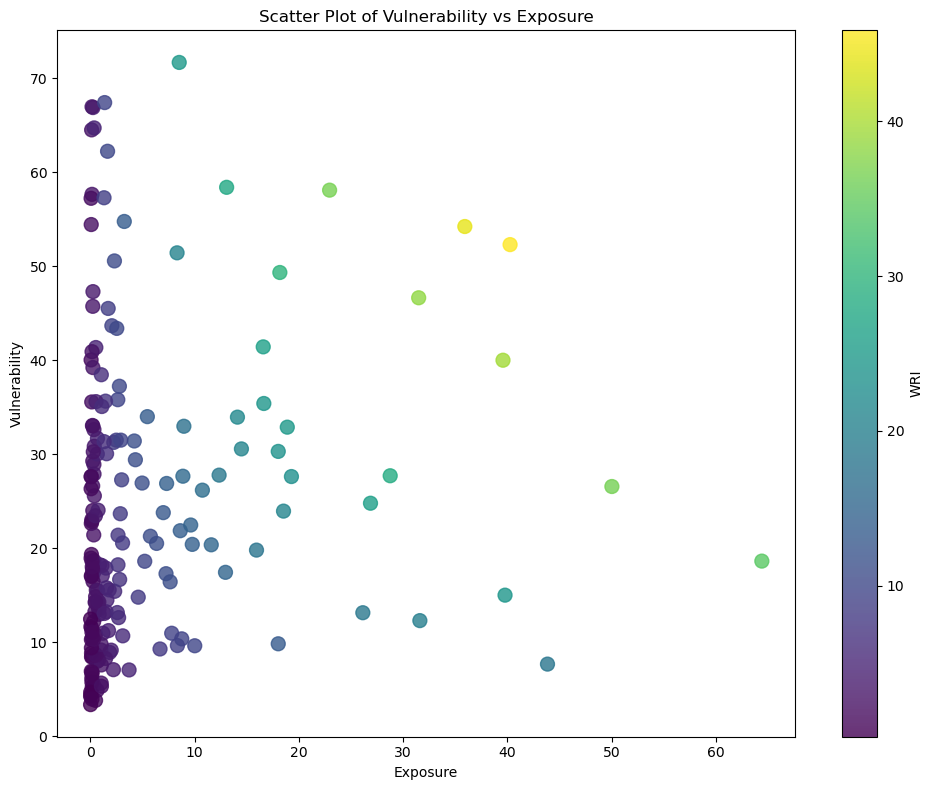

In [175]:
mean_wri = wri.groupby('Country').mean().reset_index()

plt.figure(figsize=(10, 8))
scatter = plt.scatter(data=mean_wri, x='Exposure', y='Vulnerability', c='WRI', cmap='viridis', s=100, alpha=0.8)

cbar = plt.colorbar(scatter)
cbar.set_label('WRI')

plt.title('Scatter Plot of Vulnerability vs Exposure')
plt.xlabel('Exposure')
plt.ylabel('Vulnerability')

plt.tight_layout()
plt.show()

This scatterplot illustrates that __among countries with the same level of exposure, those with lower vulnerability are less at risk from natural disasters__, as indicated by their lower WRI scores. Conversely, when vulnerability is constant, countries with higher exposure tend to have higher WRI scores, indicating greater risk.

While we cannot do much to affect exposure (except for limiting migration to dangerous locations or working on slowing down climate change), ... 

Vulnerability is key to helping countries lower their risk to natural disasters and limit the amoung of people impacted or harmed by them, with everything else the same. -- EDIT.

In [51]:
year_group = wri.groupby('Year').mean()

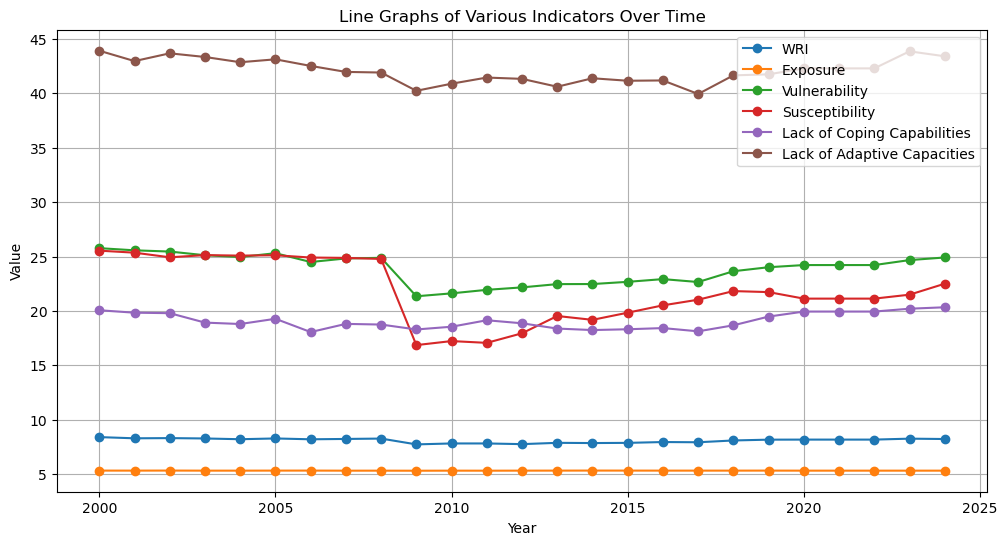

In [52]:
plt.figure(figsize=(12, 6))

for column in year_group.columns:
    plt.plot(year_group.index, year_group[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Graphs of Various Indicators Over Time')
plt.legend(loc='best')
plt.grid(True)

plt.show()

Overall, __Vulnerability__ and its subcategories of Lack of Adaptive Capacities and Susceptibility have been on a __downward trend__ from 2011 to 2021, indicating potential improvements in these areas over time. Meanwhile, Lack of Coping Capabilities, Exposure, and WRI show slight increases.

According to other sources, improvements in weather forecasting, increased wealth, and a decline in famines may have contributed to reduced vulnerability to natural disasters

In [53]:
data_2021 = wri[wri['Year'] == 2021]
wri_2021 = data_2021[['Country','WRI']]
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = gdf.rename(columns={'name': 'Country'})
gapminder = px.data.gapminder()

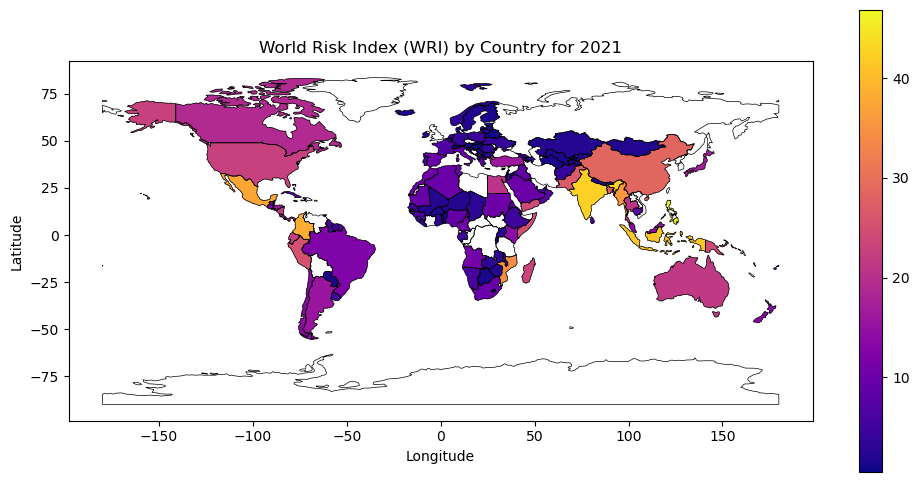

In [54]:
gdf_2021 = pd.merge(gdf, wri_2021, how='left', left_on='Country', right_on='Country')

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Choropleth map
gdf_2021.boundary.plot(ax=ax, linewidth=0.5, color='black')  
gdf_2021.plot(column='WRI', ax=ax, legend=True,
         cmap='plasma',  
         edgecolor='black',  
         linewidth=0.1) 

plt.title('World Risk Index (WRI) by Country for 2021')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [25]:
us_data = wri[wri['Country'] == 'United States']
us_data

Country   WRI  Exposure  Vulnerability  Susceptibility  \
643   United States  3.88     12.25          31.67           16.47   
1872  United States  3.76     12.25          30.68           16.35   

      Lack of Coping Capabilities  Lack of Adaptive Capacities  Year  \
643                         48.57                        29.98  2014   
1872                        48.24                        27.46  2016   

     Exposure Category WRI Category Vulnerability Category  \
643             Medium          Low               Very Low   
1872            Medium          Low               Very Low   

     Susceptibility Category  
643                 Very Low  
1872                Very Low

This map shows that some countries in Africa, South America and Central America have the highest disaster risk in 2021. The table below confirms that the blank areas on the map correspond to missing data. In the next map, we will use the mean WRI values over 2011 to 2021 for each country to provide a more comprehensive view of disaster risk across countries.

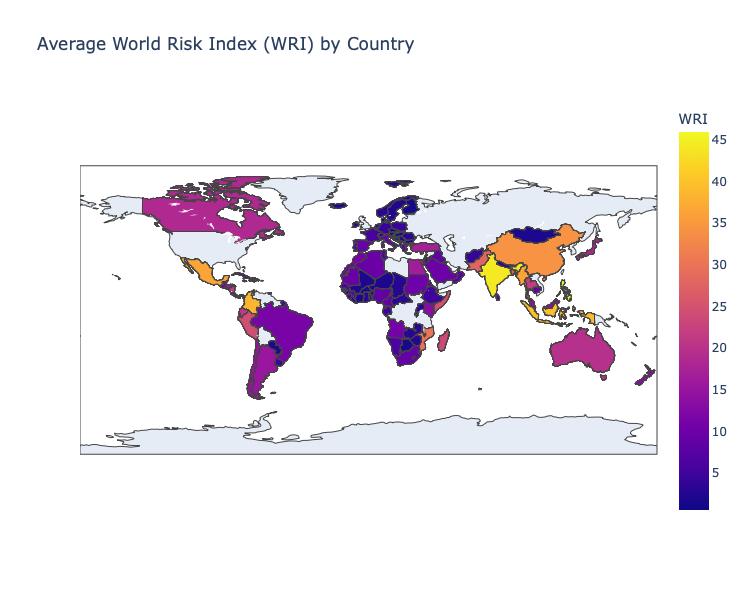

In [56]:
mean_wri = wri.groupby('Country').mean().reset_index()
df = pd.merge(gapminder, mean_wri, how='left', left_on='country', right_on='Country')

fig = px.choropleth(df, locations="iso_alpha",
                    color="WRI", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average World Risk Index (WRI) by Country',
                    width=1000,  
                    height=600)

np.random.seed(12)
fig.show()

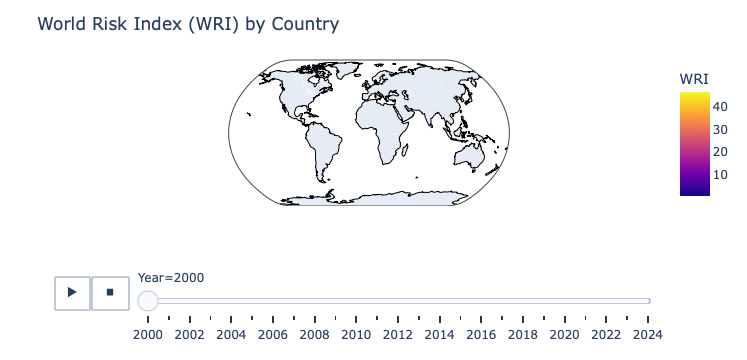

In [58]:
import plotly.express as px

# Choropleth map animation for WRI by year
fig = px.choropleth(wri,
                    locations='Country', 
                    color='WRI',           
                    hover_name='Country', 
                    animation_frame='Year',  
                    color_continuous_scale='plasma',  
                    projection='natural earth')  


fig.update_layout(title='World Risk Index (WRI) by Country',
                  geo=dict(showcoastlines=True, coastlinecolor="Black"))

fig.show()


This choropleth map highlights that certain countries in West Africa, Southeast Asia, and Central America have the highest World Risk Index (WRI). Notably, the Philippines stands out with the highest WRI on the map at 27.47. In the earlier map, the Philippines was not included in the data, causing other countries to appear with disproportionately high WRIs compared to their 10-year averages. However, by hovering over the countries on this map, we can observe that most have not experienced significant increases in WRI.

Now, let’s take a closer look at some of the countries with the highest WRI individually.

In [55]:
data_2024 = wri[wri['Year'] == 2024]
top_countries = data_2021.sort_values(by='WRI', ascending=False)
top_countries.head(10)


Country ISO3    WRI  Exposure  Vulnerability  Susceptibility  \
4187  Philippines  PHL  46.82     39.99          54.81           51.35   
4130        India  IND  42.31     35.99          49.75           39.50   
4131    Indonesia  IDN  41.46     39.89          43.10           33.48   
4089     Colombia  COL  38.37     31.54          46.69           47.84   
4163       Mexico  MEX  37.55     50.08          28.16           37.26   
4169      Myanmar  MMR  35.49     22.43          56.14           53.39   
4168   Mozambique  MOZ  34.37     18.10          65.28           64.57   
4088        China  CHN  28.70     64.59          12.75           15.78   
4066   Bangladesh  BGD  27.90     16.57          46.97           36.81   
4181     Pakistan  PAK  26.75     13.11          54.58           41.42   

      Lack of Coping Capabilities  Lack of Adaptive Capacities  Year  
4187                        57.81                        55.48  2021  
4130                        55.38                        56.29  2021  
4131                        50.67                        47.19  2021  
4089                        48.23                        44.11  2021  
4163                        12.09                        49.55  2021  
4169                        58.85                        56.30  2021  
4168                        64.54                        66.76  2021  
4088                        12.11                        10.84  2021  
4066                        59.18                        47.58  2021  
4181                        60.96                        64.41  2021

They have very high exposure and high to medium vulnerability. 

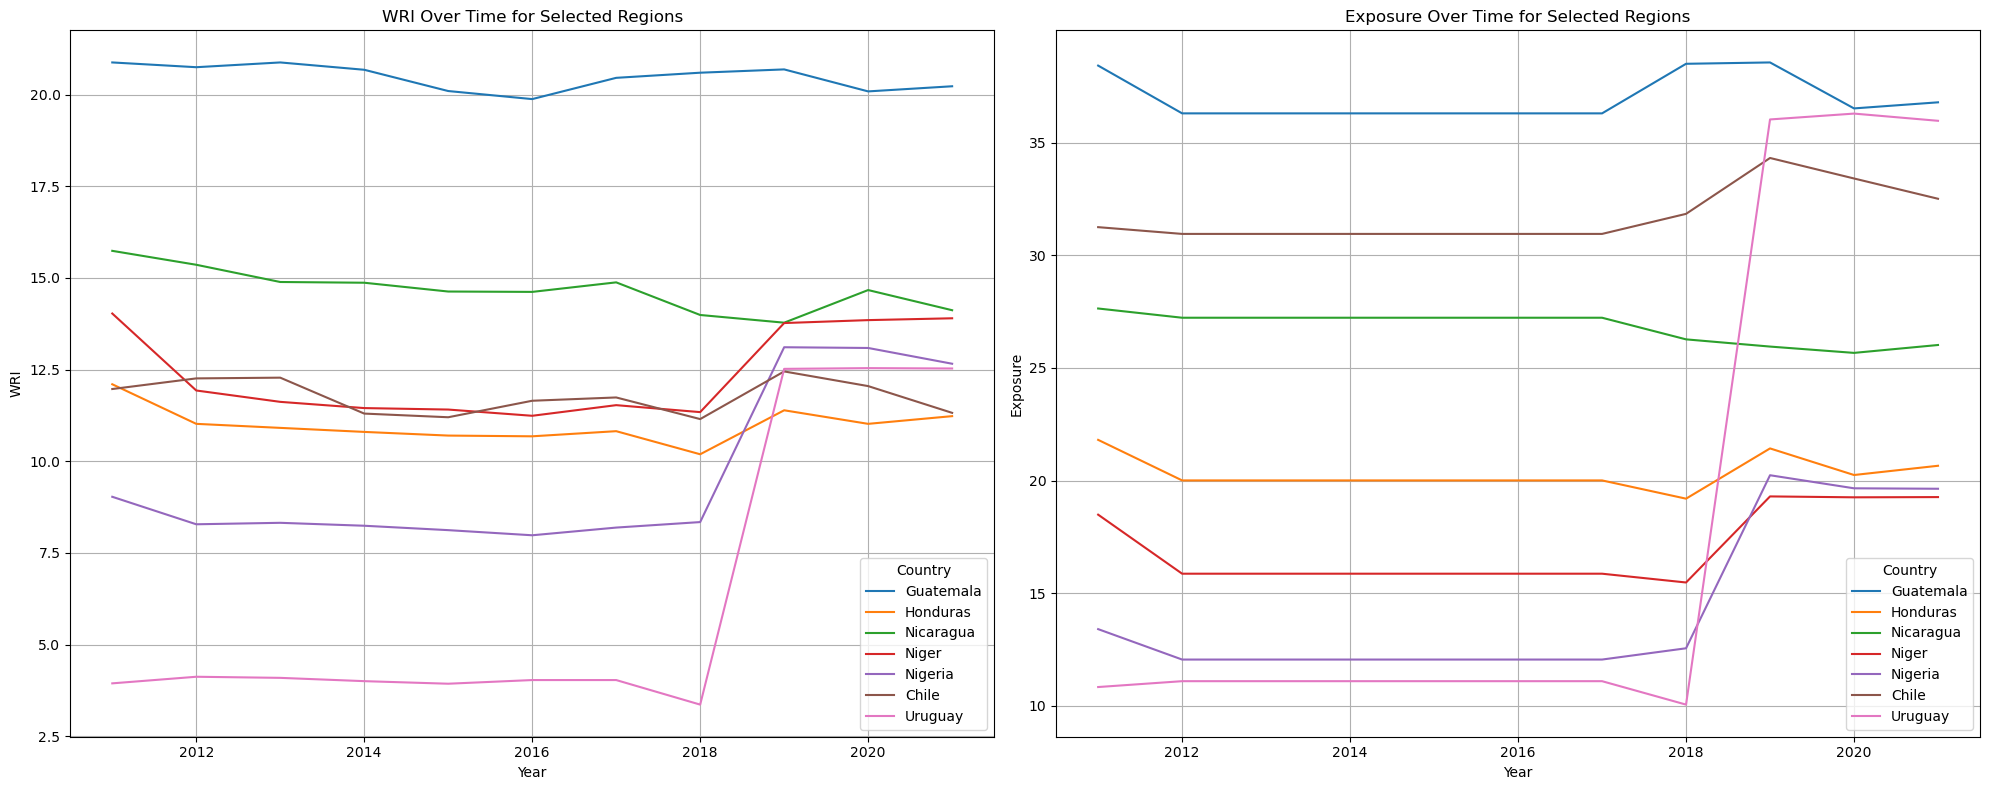

In [52]:
regions_of_interest = ['Guatemala', 'Honduras', 'Nicaragua', 'Niger', 'Nigeria', 'Chile', 'Uruguay']

wri_filtered = wri[wri['Country'].isin(regions_of_interest)]

wri_pivoted_wri = wri_filtered.pivot(index='Year', columns='Country', values='WRI')
wri_pivoted_exposure = wri_filtered.pivot(index='Year', columns='Country', values='Exposure')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# WRI
for region in regions_of_interest:
    axes[0].plot(wri_pivoted_wri.index, wri_pivoted_wri[region], label=region)

axes[0].set_title('WRI Over Time for Selected Regions')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('WRI')
axes[0].legend(title='Country')
axes[0].grid(True)

# Exposure
for region in regions_of_interest:
    axes[1].plot(wri_pivoted_exposure.index, wri_pivoted_exposure[region], label=region)

axes[1].set_title('Exposure Over Time for Selected Regions')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Exposure')
axes[1].legend(title='Country')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Since 2018, Niger, Nigeria, and Uruguay have seen both an increase in their World Risk Index (WRI) and Exposure.

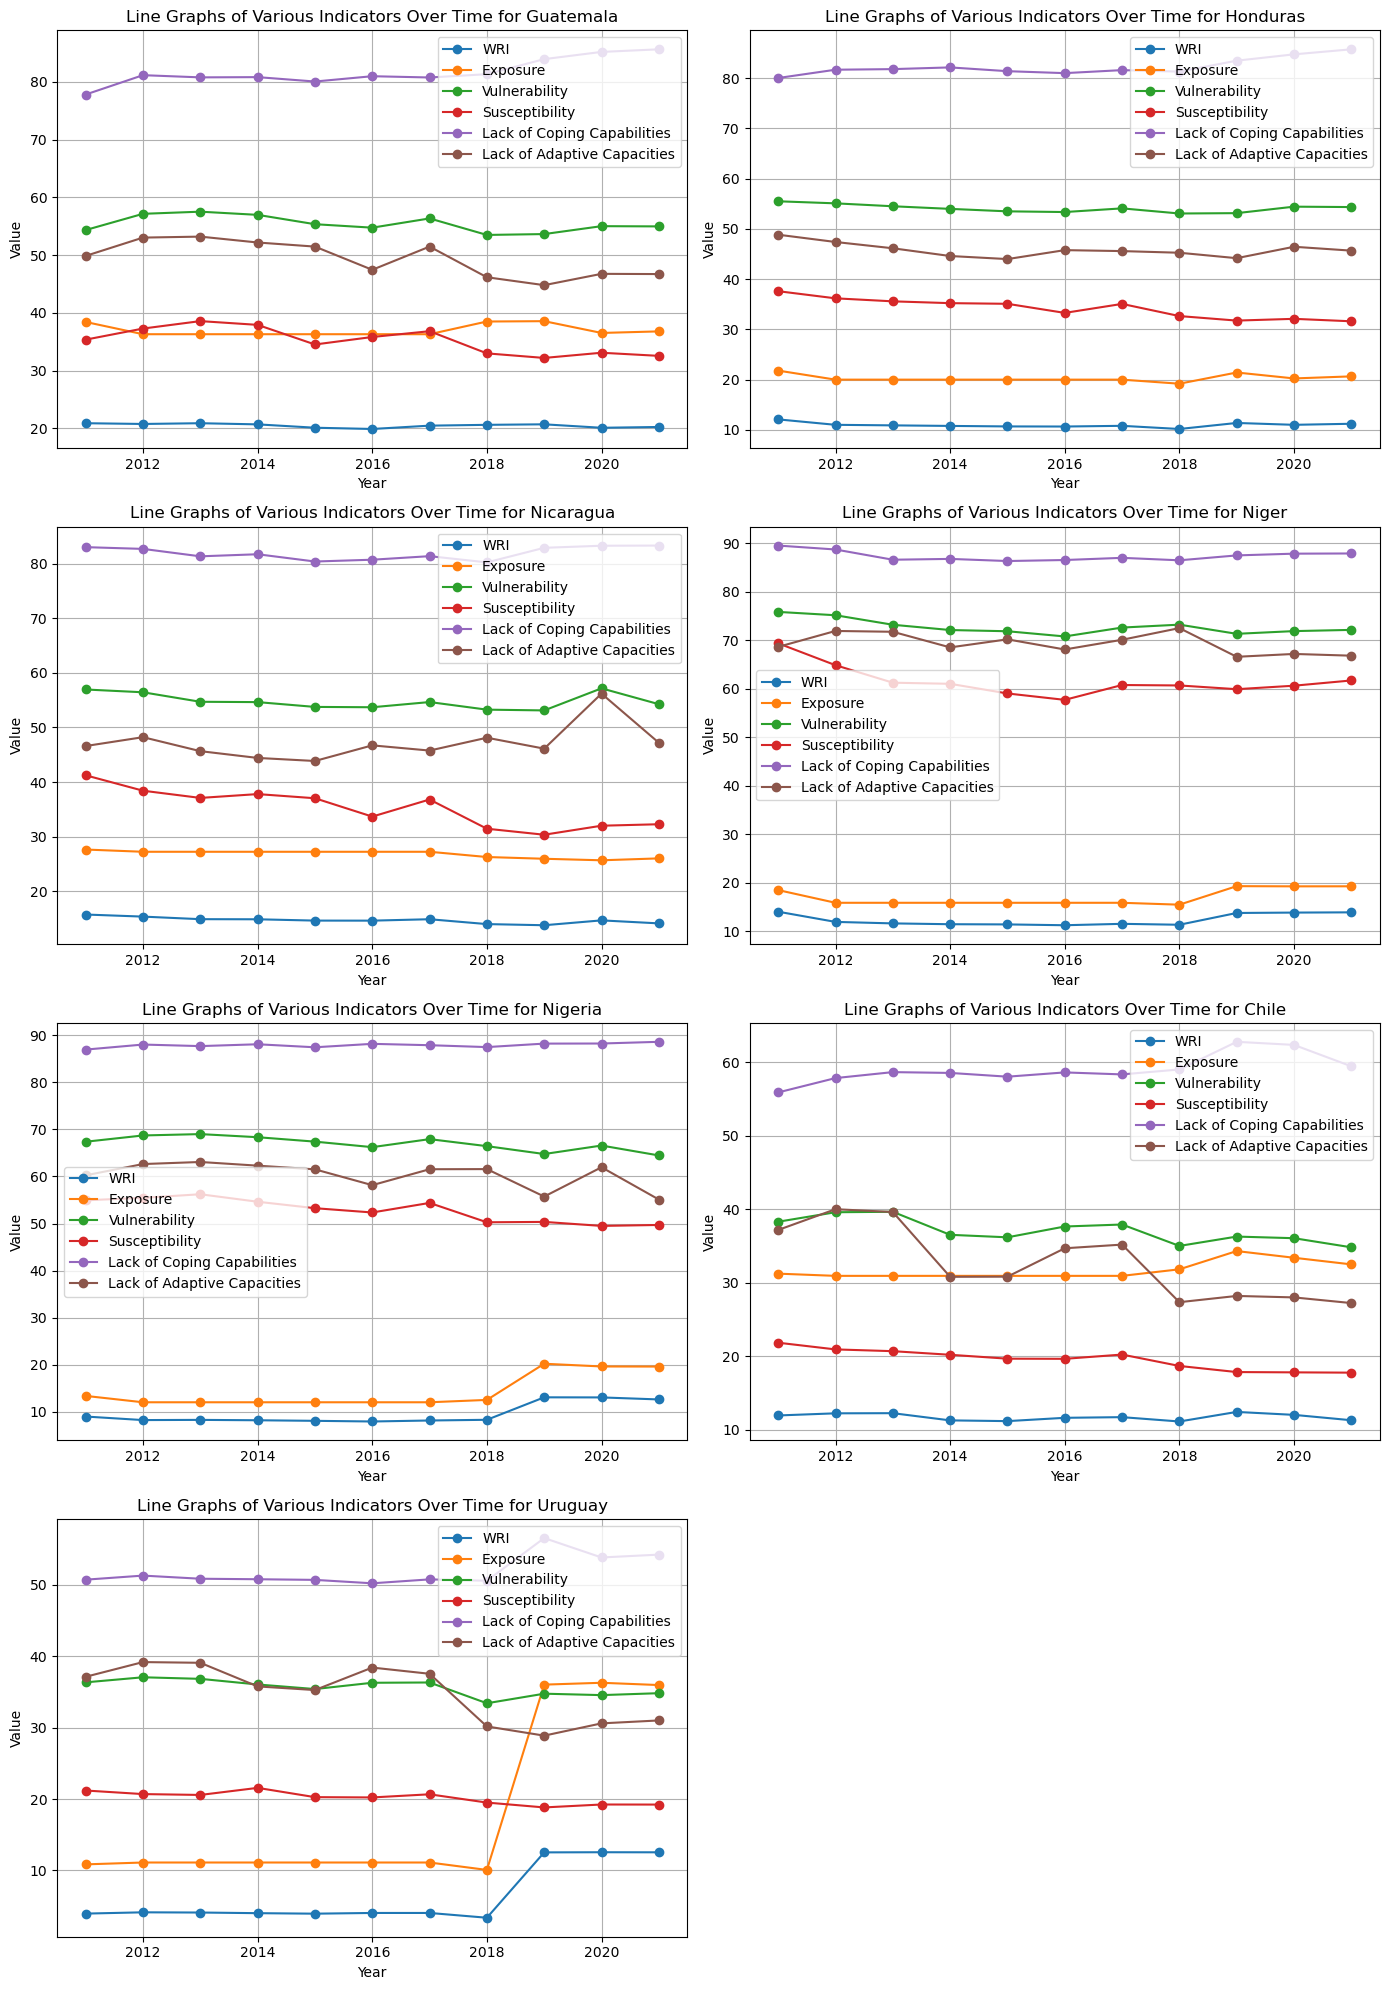

In [29]:
regions_of_interest = ['Guatemala', 'Honduras', 'Nicaragua', 'Niger', 'Nigeria', 'Chile', 'Uruguay']

num_regions = len(regions_of_interest)
rows = (num_regions + 1) // 2  
fig, axes = plt.subplots(rows, 2, figsize=(14, 5 * rows))

axes = axes.flatten()

for i, region in enumerate(regions_of_interest):
    wri_region_yr = wri[wri['Country'] == region].groupby('Year').mean()
    
    for column in wri_region_yr.columns:
        axes[i].plot(wri_region_yr.index, wri_region_yr[column], marker='o', label=column)
    
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Line Graphs of Various Indicators Over Time for {region}')
    axes[i].legend(loc='best')
    axes[i].grid(True)

if num_regions % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [28]:
data_2021 = wri[wri['Year'] == 2021]
top_countries = data_2021.sort_values(by='Vulnerability', ascending=False)
top_countries.head(10)

Country    WRI  Exposure  Vulnerability  \
761  Zentralafrikanische Republik   7.64     10.08          75.83   
717                        Tschad  11.94     15.76          75.75   
743      Demokratische Rep. Kongo   8.78     11.86          74.04   
710                         Niger  13.90     19.27          72.15   
770                       Eritrea   6.87      9.66          71.09   
711                 Guinea-Bissau  13.39     18.88          70.92   
727                       Burundi  10.42     14.88          70.02   
726                    Madagaskar  10.44     14.97          69.71   
793                         Jemen   5.72      8.27          69.12   
734                  Sierra Leone   9.40     13.65          68.87   

     Susceptibility  Lack of Coping Capabilities  Lack of Adaptive Capacities  \
761           70.52                        90.56                        66.41   
717           64.96                        92.16                        70.13   
743           67.76                        92.80                        61.55   
710           61.72                        87.91                        66.83   
770           63.28                        89.71                        60.29   
711           60.17                        89.20                        63.39   
727           62.29                        90.43                        57.34   
726           65.83                        86.32                        56.97   
793           44.85                        93.17                        69.34   
734           55.15                        85.39                        66.07   

     Year Exposure Category WRI Category Vulnerability Category  \
761  2021               Low       Medium              Very High   
717  2021              High    Very High              Very High   
743  2021               Low         High              Very High   
710  2021              High    Very High              Very High   
770  2021               Low       Medium              Very High   
711  2021              High    Very High              Very High   
727  2021              High         High              Very High   
726  2021              High         High              Very High   
793  2021          Very Low       Medium              Very High   
734  2021            Medium         High              Very High   

    Susceptibility Category  
761               Very High  
717               Very High  
743               Very High  
710               Very High  
770               Very High  
711               Very High  
727               Very High  
726               Very High  
793                    High  
734               Very High

### Risk by Continents

In [29]:
countries = pd.read_csv('Data/Countries.csv')
#countries.head()
df = pd.merge(countries, wri, how='left', on='Country')
df.head()

Country Code Continent         Region    WRI  Exposure  Vulnerability  \
0  Afghanistan  AFG      Asia  Southern Asia  14.06     18.45          76.19   
1  Afghanistan  AFG      Asia  Southern Asia   9.93     13.17          75.41   
2  Afghanistan  AFG      Asia  Southern Asia   9.55     13.17          72.49   
3  Afghanistan  AFG      Asia  Southern Asia   9.71     13.17          73.73   
4  Afghanistan  AFG      Asia  Southern Asia   8.18     12.27          66.63   

   Susceptibility  Lack of Coping Capabilities  Lack of Adaptive Capacities  \
0           61.09                        93.94                        73.55   
1           56.67                        93.44                        76.11   
2           55.77                        92.36                        69.33   
3           55.93                        93.37                        71.89   
4           48.57                        91.40                        59.93   

     Year Exposure Category WRI Category Vulnerability Category  \
0  2011.0         Very High    Very High              Very High   
1  2013.0            Medium         High              Very High   
2  2015.0            Medium         High              Very High   
3  2014.0            Medium         High              Very High   
4  2021.0            Medium         High              Very High   

  Susceptibility Category  
0               Very High  
1               Very High  
2               Very High  
3               Very High  
4               Very High

In [30]:
df['Region'].nunique()

23

In [32]:
HDI_2021 = pd.read_csv('Data/2021_development.csv')

In [33]:
WRI_2021 = wri[wri['Year'] == 2021]
wri_hdi_2021 = pd.merge(WRI_2021, HDI_2021, how='left', on='Country')
wri_hdi_2021.head()

Country    WRI  Exposure  Vulnerability  Susceptibility  \
0              Vanuatu  47.73     82.55          57.82           39.66   
1            Salomonen  31.16     51.13          60.95           46.07   
2                Tonga  30.51     63.63          47.95           28.42   
3             Dominica  27.42     61.74          44.41           23.42   
4  Antigua und Barbuda  27.28     67.73          40.28           23.80   

   Lack of Coping Capabilities  Lack of Adaptive Capacities  Year  \
0                        81.21                        52.59  2021   
1                        81.14                        55.63  2021   
2                        79.81                        35.62  2021   
3                        71.13                        38.67  2021   
4                        64.41                        32.62  2021   

  Exposure Category WRI Category Vulnerability Category  \
0         Very High    Very High                   High   
1         Very High    Very High                   High   
2         Very High    Very High                 Medium   
3         Very High    Very High                 Medium   
4         Very High    Very High                    Low   

  Susceptibility Category  HDI rank  Human Development Index (HDI) - 2021  \
0                    High     140.0                                 0.607   
1               Very High       NaN                                   NaN   
2                    High      91.0                                 0.745   
3                  Medium     102.0                                 0.720   
4                  Medium       NaN                                   NaN   

   Life expectancy at birth - 2021  Expected years of schooling - 2021  \
0                             70.4                                11.5   
1                              NaN                                 NaN   
2                             71.0                                16.0   
3                             72.8                                13.3   
4                              NaN                                 NaN   

   Mean years of schooling - 2021  \
0                             7.1   
1                             NaN   
2                            11.4   
3                             8.1   
4                             NaN   

   Gross national income (GNI) per capita - 2021  
0                                         3085.0  
1                                            NaN  
2                                         6822.0  
3                                        11488.0  
4                                            NaN

In [34]:
null_counts = wri_hdi_2021.isnull().sum()
null_counts

Country                                            0
WRI                                                0
Exposure                                           0
Vulnerability                                      0
Susceptibility                                     0
Lack of Coping Capabilities                        0
Lack of Adaptive Capacities                        0
Year                                               0
Exposure Category                                  0
WRI Category                                       0
Vulnerability Category                             0
Susceptibility Category                            0
HDI rank                                         111
Human Development Index (HDI) - 2021             111
Life expectancy at birth - 2021                  111
Expected years of schooling - 2021               111
Mean years of schooling - 2021                   111
Gross national income (GNI) per capita - 2021    111
dtype: int64

In [36]:
wri_hdi_2021_cleaned = wri_hdi_2021.dropna(subset=['HDI rank'])

In [37]:
top_countries = wri_hdi_2021_cleaned.sort_values(by='Vulnerability', ascending=False)
top_countries.head(10)

Country    WRI  Exposure  Vulnerability  Susceptibility  \
22          Niger  13.90     19.27          72.15           61.72   
82        Eritrea   6.87      9.66          71.09           63.28   
23  Guinea-Bissau  13.39     18.88          70.92           60.17   
39        Burundi  10.42     14.88          70.02           62.29   
46   Sierra Leone   9.40     13.65          68.87           55.15   
36           Mali  10.71     15.61          68.64           49.75   
57         Guinea   8.65     12.70          68.08           51.87   
20          Haiti  14.54     21.41          67.91           49.93   
34   Burkina Faso  11.19     16.59          67.48           57.08   
58         Uganda   8.64     12.88          67.07           61.54   

    Lack of Coping Capabilities  Lack of Adaptive Capacities  Year  \
22                        87.91                        66.83  2021   
82                        89.71                        60.29  2021   
23                        89.20                        63.39  2021   
39                        90.43                        57.34  2021   
46                        85.39                        66.07  2021   
36                        88.60                        67.58  2021   
57                        89.08                        63.29  2021   
20                        90.36                        63.44  2021   
34                        84.39                        60.98  2021   
58                        88.05                        51.63  2021   

   Exposure Category WRI Category Vulnerability Category  \
22              High    Very High              Very High   
82               Low       Medium              Very High   
23              High    Very High              Very High   
39              High         High              Very High   
46            Medium         High              Very High   
36              High         High              Very High   
57            Medium         High              Very High   
20         Very High    Very High              Very High   
34              High    Very High              Very High   
58            Medium         High              Very High   

   Susceptibility Category  HDI rank  Human Development Index (HDI) - 2021  \
22               Very High     189.0                                 0.400   
82               Very High     176.0                                 0.492   
23               Very High     177.0                                 0.483   
39               Very High     187.0                                 0.426   
46               Very High     181.0                                 0.477   
36               Very High     186.0                                 0.428   
57               Very High     182.0                                 0.465   
20               Very High     163.0                                 0.535   
34               Very High     184.0                                 0.449   
58               Very High     166.0                                 0.525   

    Life expectancy at birth - 2021  Expected years of schooling - 2021  \
22                             61.6                                 7.0   
82                             66.5                                 8.1   
23                             59.7                                10.6   
39                             61.7                                10.7   
46                             60.1                                 9.6   
36                             58.9                                 7.4   
57                             58.9                                 9.8   
20                             63.2                                 9.7   
34                             59.3                                 9.1   
58                             62.7                                10.1   

    Mean years of schooling - 2021  \
22                             2.1   
82                             4.9   
23                 

In [38]:
top_countries = wri_hdi_2021_cleaned.sort_values(by='WRI', ascending=False)
top_countries.head(10)

Country    WRI  Exposure  Vulnerability  Susceptibility  \
0             Vanuatu  47.73     82.55          57.82           39.66   
2               Tonga  30.51     63.63          47.95           28.42   
3            Dominica  27.42     61.74          44.41           23.42   
5   Brunei Darussalam  22.77     58.17          39.14           15.33   
6              Guyana  21.83     43.93          49.69           25.96   
9           Guatemala  20.23     36.79          54.98           32.55   
11         Costa Rica  17.06     44.27          38.54           19.96   
15        Timor-Leste  15.75     28.27          55.73           41.83   
17        El Salvador  15.32     31.62          48.46           24.31   
18           Kiribati  15.14     26.41          57.34           39.67   

    Lack of Coping Capabilities  Lack of Adaptive Capacities  Year  \
0                         81.21                        52.59  2021   
2                         79.81                        35.62  2021   
3                         71.13                        38.67  2021   
5                         68.13                        33.96  2021   
6                         77.23                        45.88  2021   
9                         85.66                        46.72  2021   
11                        65.33                        30.34  2021   
15                        75.72                        49.64  2021   
17                        78.66                        42.41  2021   
18                        82.82                        49.52  2021   

   Exposure Category WRI Category Vulnerability Category  \
0          Very High    Very High                   High   
2          Very High    Very High                 Medium   
3          Very High    Very High                 Medium   
5          Very High    Very High                    Low   
6          Very High    Very High                   High   
9          Very High    Very High                   High   
11         Very High    Very High                    Low   
15         Very High    Very High                   High   
17         Very High    Very High                   High   
18         Very High    Very High                   High   

   Susceptibility Category  HDI rank  Human Development Index (HDI) - 2021  \
0                     High     140.0                                 0.607   
2                     High      91.0                                 0.745   
3                   Medium     102.0                                 0.720   
5                 Very Low      51.0                                 0.829   
6                   Medium     108.0                                 0.714   
9                     High     135.0                                 0.627   
11                     Low      58.0                                 0.809   
15                    High     140.0                                 0.607   
17                  Medium     125.0                                 0.675   
18                    High     136.0                                 0.624   

    Life expectancy at birth - 2021  Expected years of schooling - 2021  \
0                              70.4                                11.5   
2                              71.0                                16.0   
3                              72.8                                13.3   
5                              74.6                                14.0   
6                              65.7                                12.5   
9                              69.2                                10.6   
11                             77.0                                16.5   
15                             67.7                                12.6   
17                             70.7                                12.7   
18                             67.4                                11.8   

    Mean years of schooling - 2021  \
0                              7.1   
2                

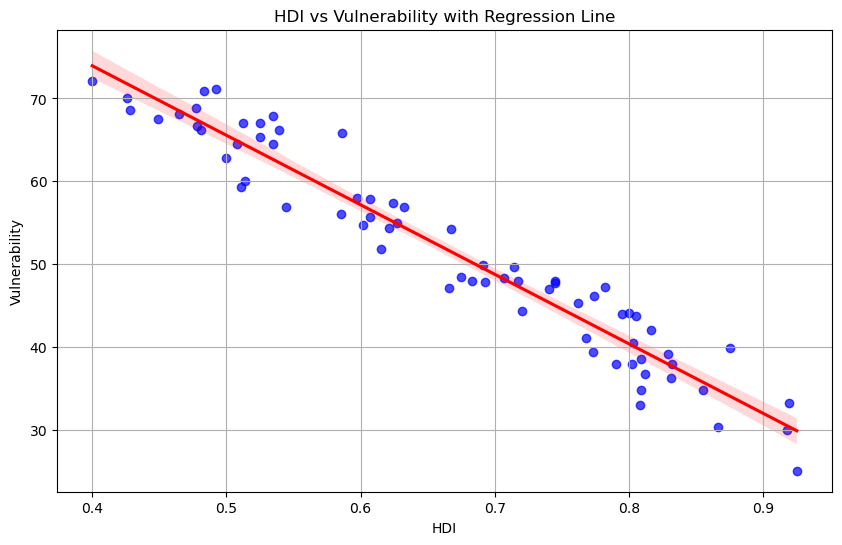

In [38]:
plt.figure(figsize=(10, 6))
sns.regplot(data=wri_hdi_2021_cleaned, x='Human Development Index (HDI) - 2021', y='Vulnerability', scatter_kws={'color':'blue', 'alpha':0.7}, line_kws={'color':'red'})
plt.title('HDI vs Vulnerability with Regression Line')
plt.xlabel('HDI')
plt.ylabel('Vulnerability')
plt.grid(True)
plt.show()

There is a strong negative correlation between HDI and WRI. Countries with higher levels of human development, such as better education, health, and living standards, generally experience lower levels of risk associated with natural disasters. 

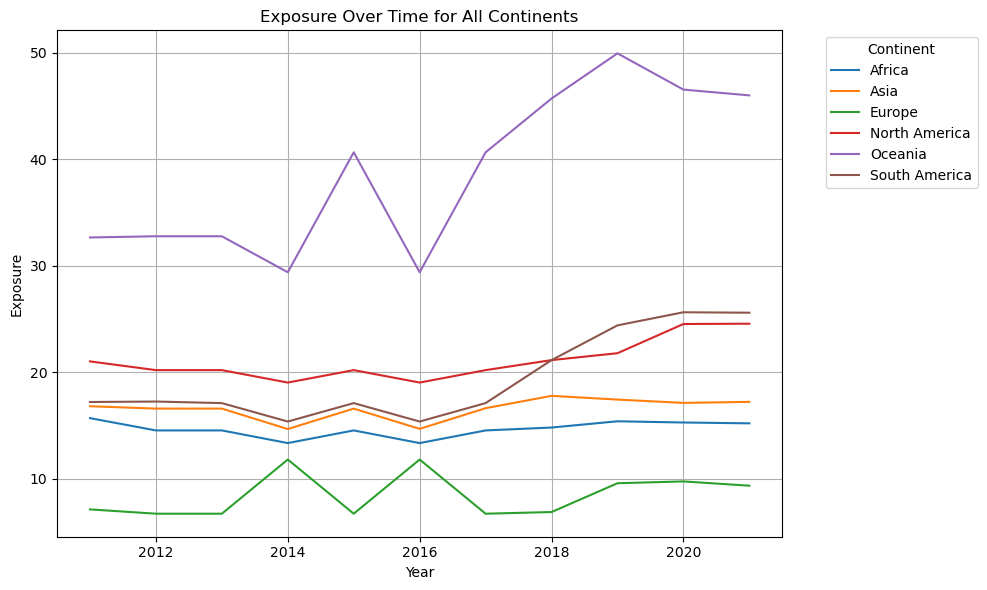

In [46]:
df_grouped = df.groupby(['Year', 'Continent']).mean().reset_index()

wri_pivoted_vulnerability = df_grouped.pivot(index='Year', columns='Continent', values='Exposure')

fig, ax = plt.subplots(figsize=(10, 6))

for region in wri_pivoted_vulnerability.columns:
    ax.plot(wri_pivoted_vulnerability.index, wri_pivoted_vulnerability[region], label=region)

ax.set_title('Exposure Over Time for All Continents')
ax.set_xlabel('Year')
ax.set_ylabel('Exposure')
ax.grid(True)
ax.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

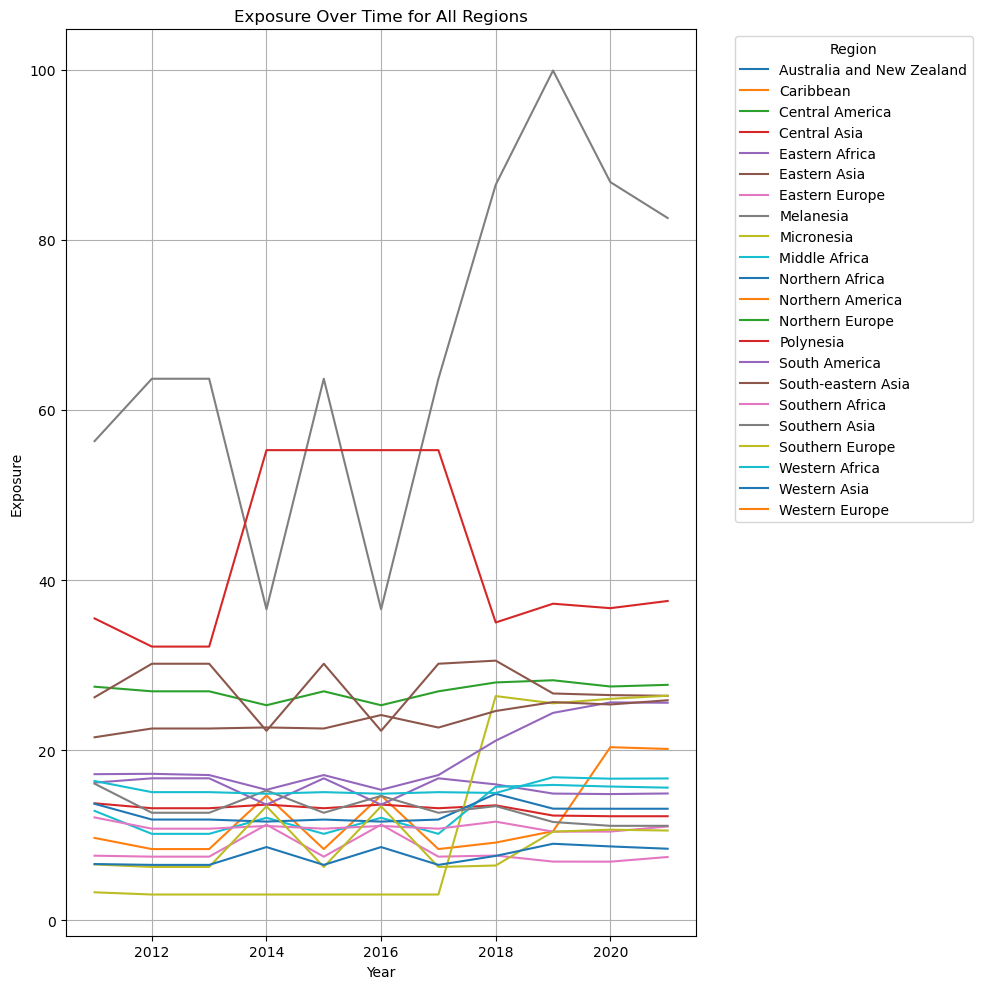

In [47]:
df_grouped = df.groupby(['Year', 'Region']).mean().reset_index()

wri_pivoted_vulnerability = df_grouped.pivot(index='Year', columns='Region', values='Exposure')

fig, ax = plt.subplots(figsize=(10, 10))

for region in wri_pivoted_vulnerability.columns:
    ax.plot(wri_pivoted_vulnerability.index, wri_pivoted_vulnerability[region], label=region)

ax.set_title('Exposure Over Time for All Regions')
ax.set_xlabel('Year')
ax.set_ylabel('Exposure')
ax.grid(True)
ax.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Regression Analysis

### Vulnerability vs GNI per capita, PPP (current international $) -- All Years

Vulnerability vs wri_ppp 

In [183]:
wri_ppp.head()
#Vulnerability, PPP

Country ISO3    WRI  Exposure  Vulnerability  Susceptibility  \
0          Afghanistan  AFG   4.19      0.25          70.32           61.91   
1              Albania  ALB   6.53      2.38          17.94           12.58   
2              Algeria  DZA  10.29      2.65          39.94           30.07   
4               Angola  AGO  11.06      2.18          56.09           35.52   
5  Antigua and Barbuda  ATG   4.25      1.21          14.95           11.38   

   Lack of Coping Capabilities  Lack of Adaptive Capacities  Year  \
0                        78.59                        71.47  2000   
1                        44.15                        10.40  2000   
2                        51.99                        40.76  2000   
4                        65.02                        76.41  2000   
5                         9.83                        29.87  2000   

       Continent           Region         Country Name      PPP  
0           Asia    Southern Asia          Afghanistan    810.0  
1         Europe  Southern Europe              Albania   3980.0  
2         Africa  Northern Africa              Algeria   8800.0  
4         Africa    Middle Africa               Angola   2790.0  
5  North America        Caribbean  Antigua and Barbuda  18240.0

### Simple Linear Regression
Variables: 
* Y = Vulnerability 
* X = PPP

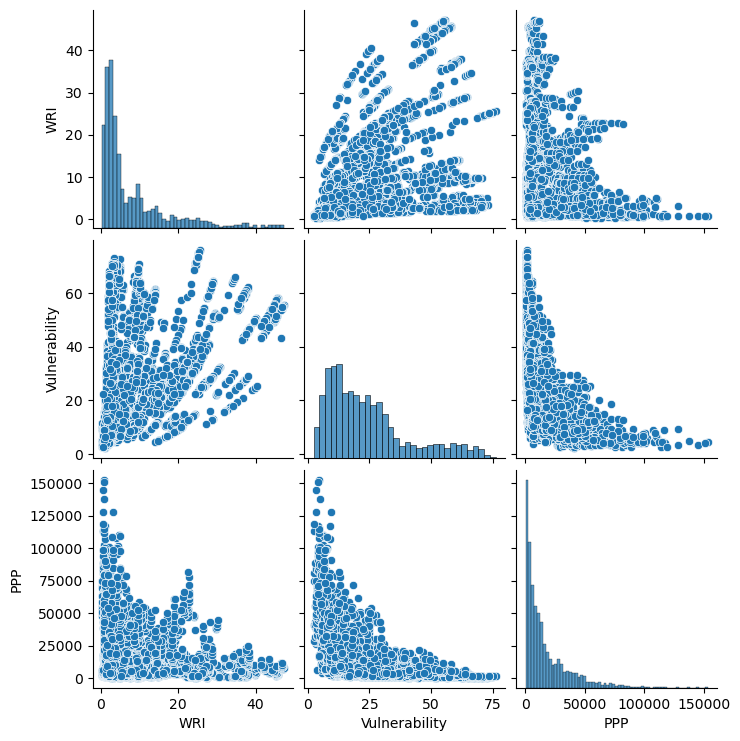

In [240]:
df = wri_ppp[['WRI','Vulnerability','PPP']]
sns.pairplot(df)
#sns.pairplot(wri_ppp)

The relationship between PPP and Vulnerability is non-linear. So we'll need to transform the data to meet the Linearity assumption of linear regression. 


Note that both PPP and Vulnerability are skewed to the right. 

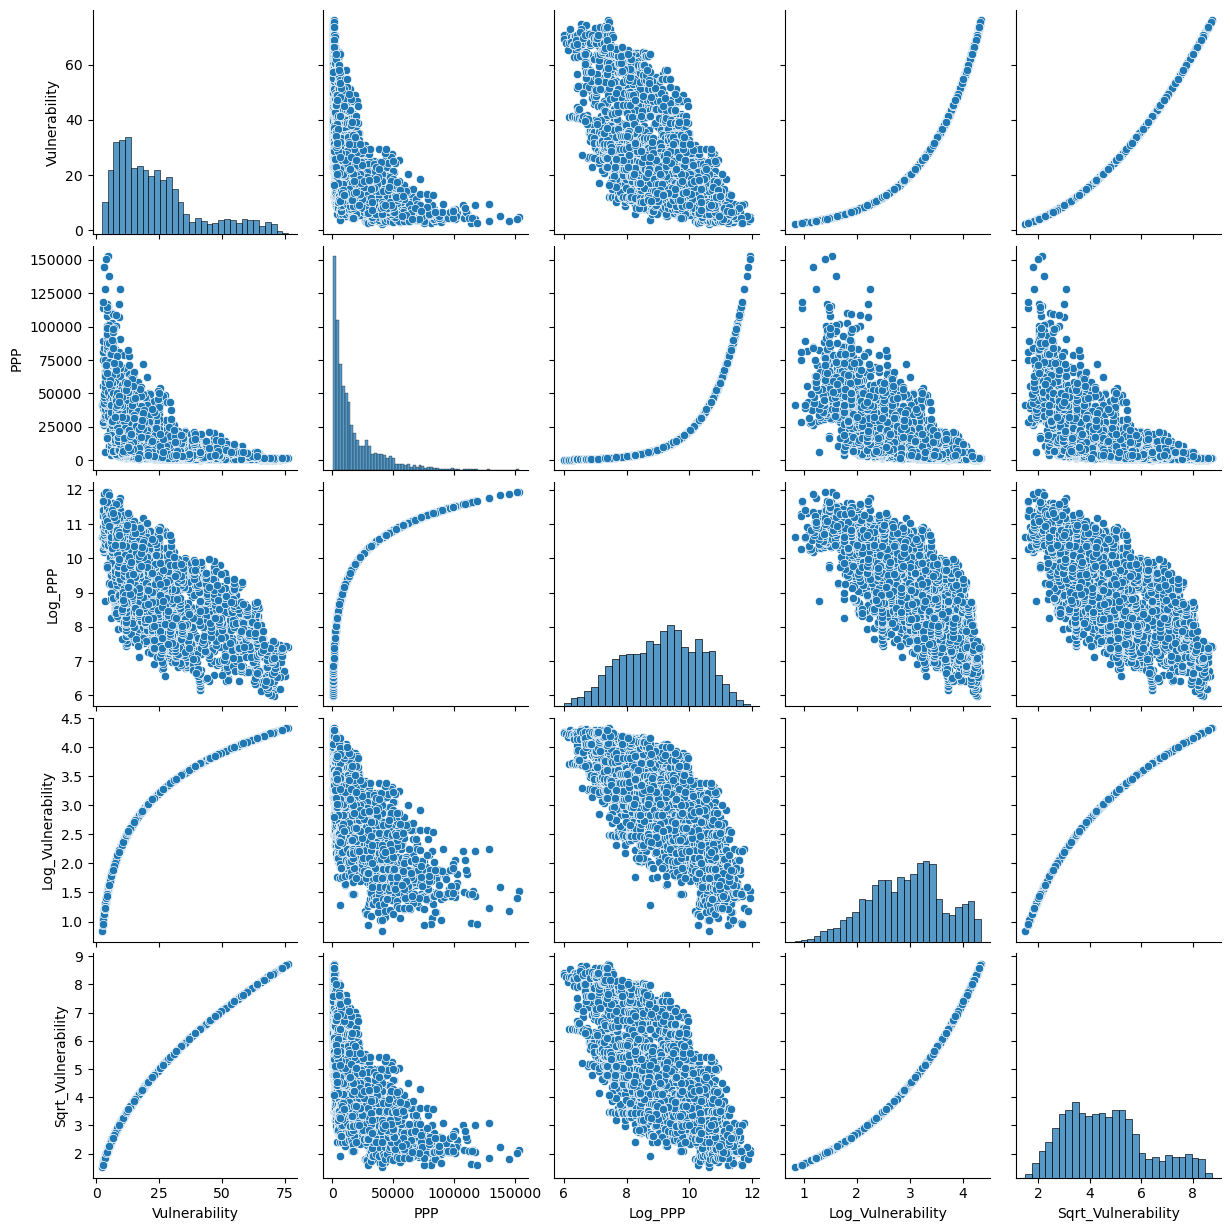

In [271]:
wri_ppp['Log_PPP'] = np.log(wri_ppp['PPP'])
wri_ppp['Log_Vulnerability'] = np.log(wri_ppp['Vulnerability'])
wri_ppp['Sqrt_Vulnerability'] = np.sqrt(wri_ppp['Vulnerability'])

#testing several transformations
df = wri_ppp[['Vulnerability', 'PPP', 'Log_PPP','Log_Vulnerability','Sqrt_Vulnerability']]
sns.pairplot(df)

The relationship between Vulnerability and Log_PPP is roughly linear. The scatterplot of PPP vs Log_PPP visualizes the transformation. 

#### Checking the Assumptions: 
1. **Linearity:** Yes, negative correlated. 
2. **Normality:** Both Log_PPP are close to being normaly distributed. This suggests we'll probably have normally distributed residuals. We'll check again after creating the model.
3. **Independent Observations** May need to choose just one country.
4. **Homoscedasticity** - we'll check after we build our model and graph the residuals

In [242]:
#regression data
ols_data = wri_ppp[['Vulnerability', 'Log_PPP']]

#regression formula 
ols_formula = "Vulnerability ~ Log_PPP"

In [243]:
#Build OLS , fit model to data

from statsmodels.formula.api import ols 

OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [244]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Vulnerability   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     4382.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:13:56   Log-Likelihood:                -17043.
No. Observations:                4395   AIC:                         3.409e+04
Df Residuals:                    4393   BIC:                         3.410e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.4494      1.348     83.400      0.000     109.806     115.093
Log_PPP       -9.7004      0.147    -66.199      0.000      -9.988      -9.413
==============================================================================
Omnibus:                      357.781   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.070
Skew:                           0.765   Prob(JB):                     5.04e-98
Kurtosis:                       3.321   Cond. No.                         71.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Vulnerability = 112.45 - 9.70 * Log_PPP**

## Finish checking the model's assumptions

Calculate some fitted values using the predict function, and calculate the residuals

In [245]:
X = ols_data["Log_PPP"]

#Get predictions from model 
fitted_values = model.predict(X)

residuals = model.resid

<AxesSubplot:xlabel='Log_PPP', ylabel='Vulnerability'>

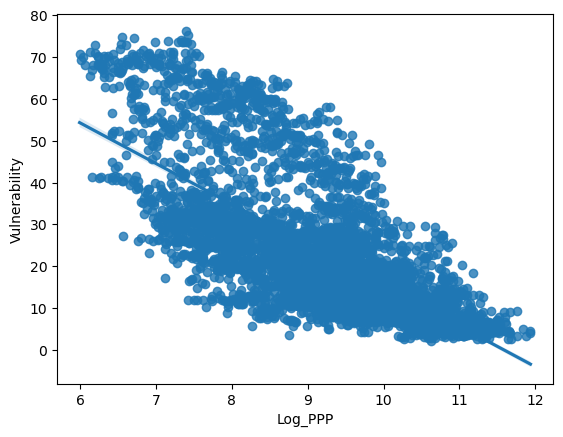

In [247]:
#plot the data with the best fit regression line 
sns.regplot(x = "Log_PPP", y = "Vulnerability", data = ols_data)

Checking Linear Regression Assumptions: 

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


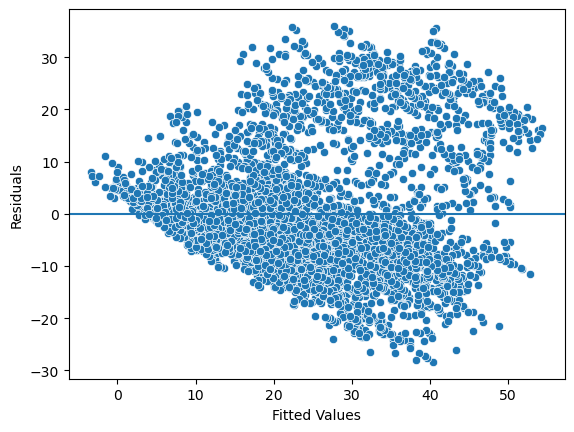

In [248]:
import matplotlib.pyplot as plt 
fig = sns.scatterplot(fitted_values, residuals) 
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

The residuals does not seem randomly spaced, so the homestaticity assumption is not met. The independent assumption may have been violated. 

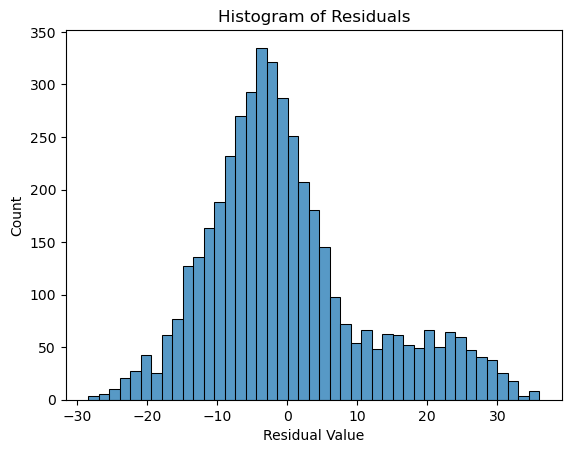

In [249]:
### Check that residuals are normally distributed
#if yes, the normality assumption has been met

fig = sns.histplot(residuals) 
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show() 

In [1]:
## the residual "may" be a little skewed, create a QQ plot to verify normality 
#confirmation of the normality assumption
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

This plot depicts data that was drawn from an exponential or uniform distribution. -->this is probably because the y variable, Vulnerability, was skewed to the right. 

We will transform Vulnerability using Log and create a new model. 

### **Log_Vulnerability vs Log_PPP**

In the scatterplots above, the relationship between Log Vulnerability and Log PPP appears to be a negatively correlated linear relationship, so we can create the Linear Regression model.

In [272]:
from statsmodels.formula.api import ols 

#regression data
ols_data = wri_ppp[['Log_Vulnerability', 'Log_PPP']]
#regression formula 
ols_formula = "Log_Vulnerability ~ Log_PPP"

OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Log_Vulnerability   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     5738.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:30:11   Log-Likelihood:                -2895.8
No. Observations:                4395   AIC:                             5796.
Df Residuals:                    4393   BIC:                             5808.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9894      0.054    129.603      0.000       6.884       7.095
Log_PPP       -0.4440      0.006    -75.751      0.000      -0.455      -0.432
==============================================================================
Omnibus:                        8.158   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.410
Skew:                           0.056   Prob(JB):                       0.0246
Kurtosis:                       2.833   Cond. No.                         71.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Log_PPP', ylabel='Log_Vulnerability'>

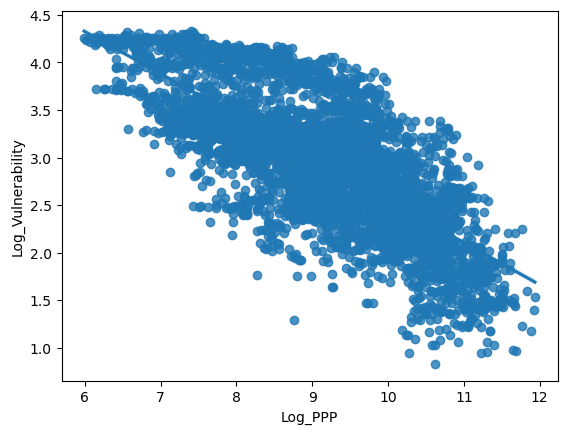

In [273]:
X = ols_data["Log_PPP"]

fitted_values = model.predict(X)
residuals = model.resid
sns.regplot(x = "Log_PPP", y = "Log_Vulnerability", data = ols_data)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


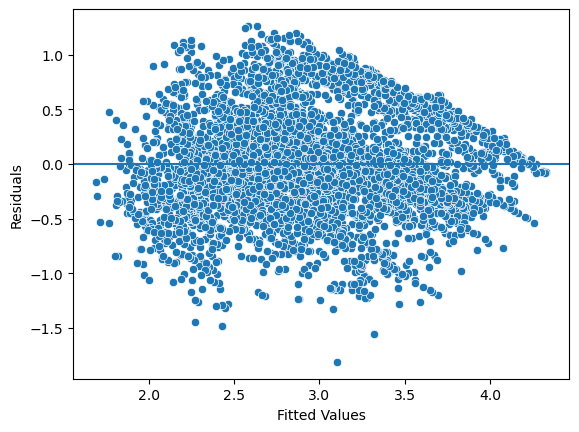

In [274]:
fig = sns.scatterplot(fitted_values, residuals) 
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

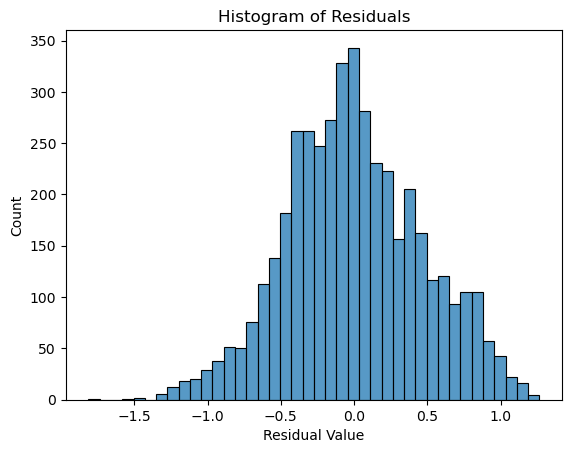

In [275]:
fig = sns.histplot(residuals) 
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show() 

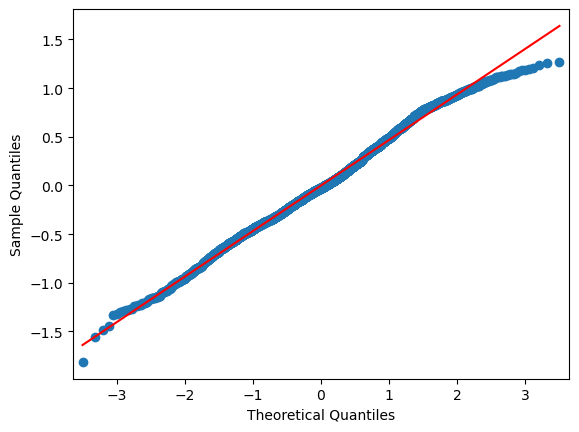

In [276]:
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

## Linear Regression with only data from 2024

/var/folders/yt/gz2xy7z95nv3ky_bfj5170mh0000gn/T/ipykernel_1039/2920086977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Log_PPP'] = np.log(df2['PPP'])
/var/folders/yt/gz2xy7z95nv3ky_bfj5170mh0000gn/T/ipykernel_1039/2920086977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sqrt_PPP'] = np.sqrt(df2['PPP'])
/var/folders/yt/gz2xy7z95nv3ky_bfj5170mh0000gn/T/ipykernel_1039/2920086977.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

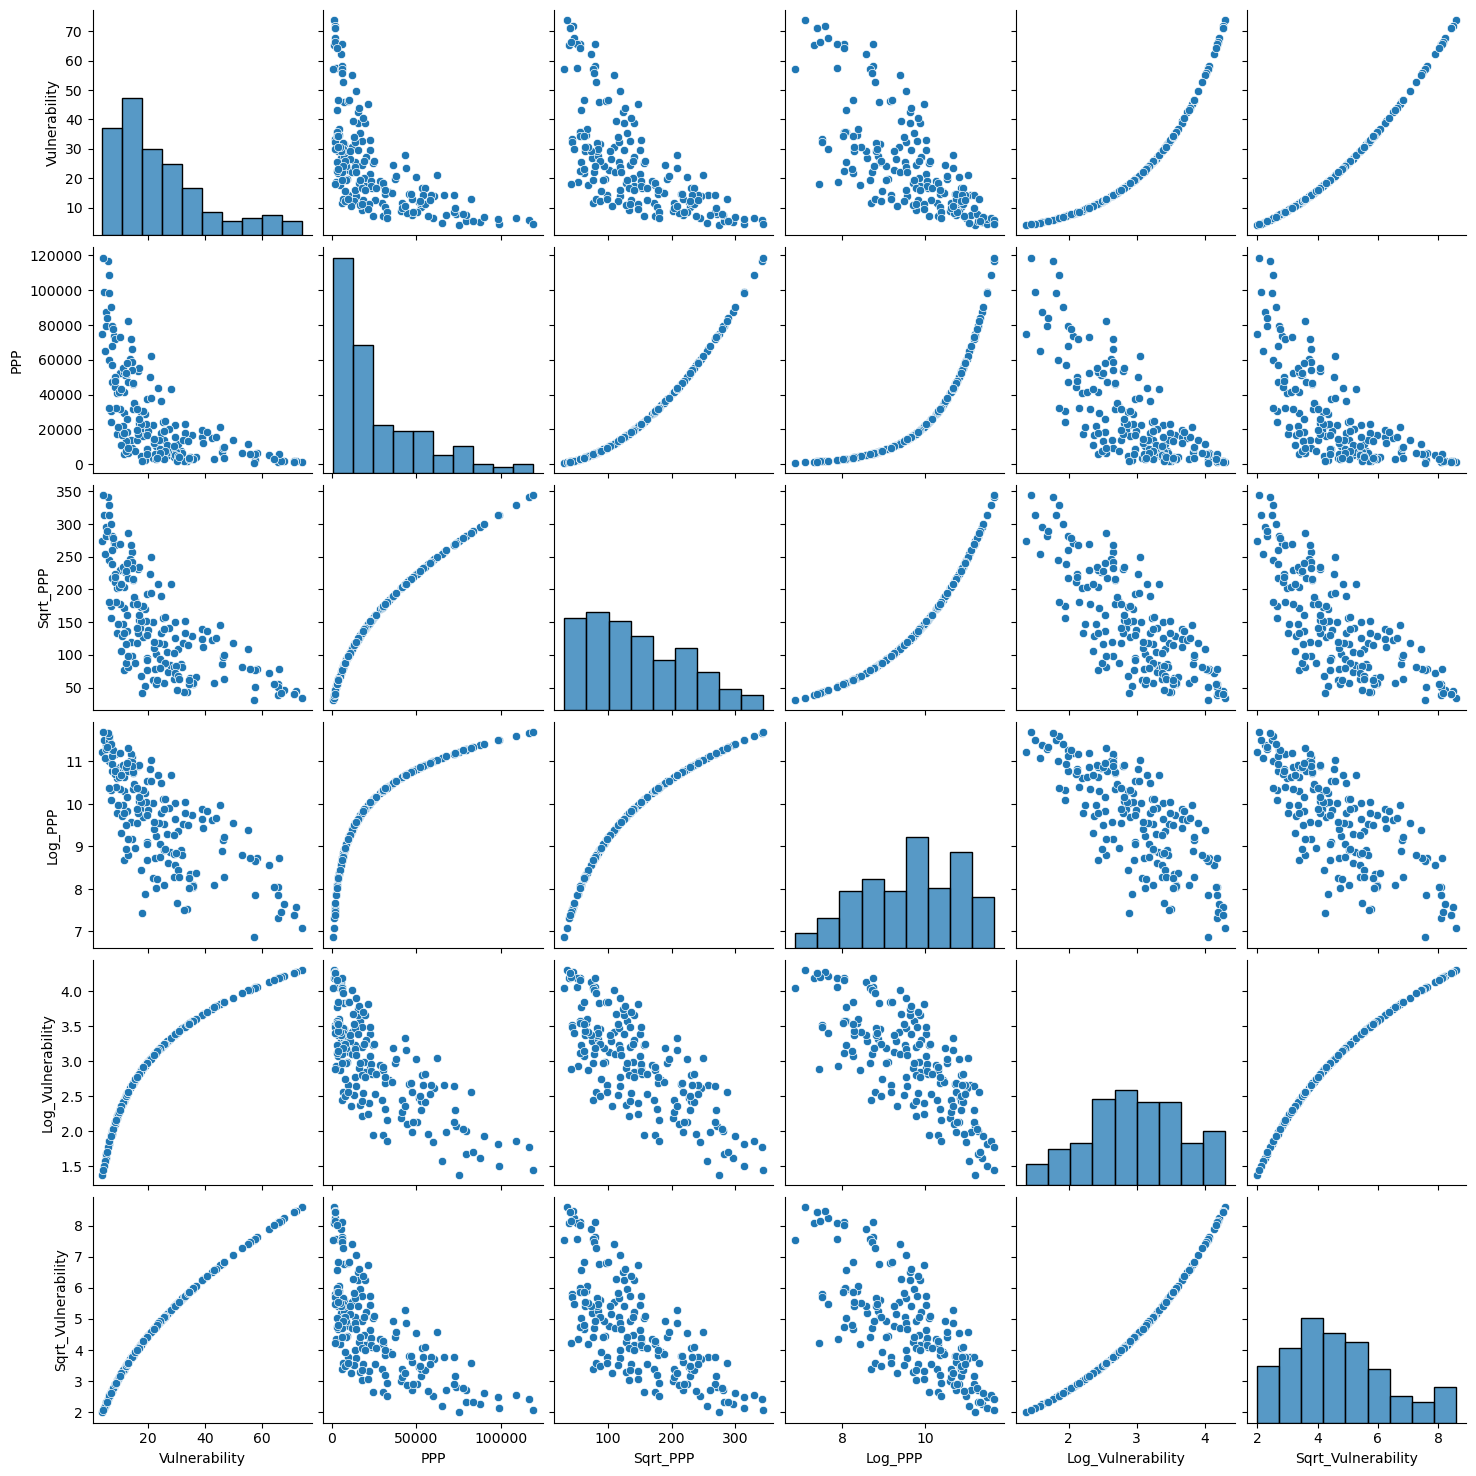

In [263]:

#df2 = wri_2024
df2 = wri_2024[['WRI','Exposure', 'Vulnerability','PPP']]

df2['Log_PPP'] = np.log(df2['PPP'])
df2['Sqrt_PPP'] = np.sqrt(df2['PPP'])

df2['Log_Vulnerability'] = np.log(df2['Vulnerability'])
df2['Sqrt_Vulnerability'] = np.sqrt(df2['Vulnerability'])

#df2 = df2[['WRI','Vulnerability', 'Susceptibility','PPP', 'Log_PPP']]
df2 = df2[['Vulnerability', 'PPP', 'Sqrt_PPP','Log_PPP','Log_Vulnerability','Sqrt_Vulnerability']]

sns.pairplot(df2)


In [288]:
from statsmodels.formula.api import ols 

#regression data
ols_data = df2[['Log_Vulnerability', 'Log_PPP']]
#regression formula 
ols_formula = "Log_Vulnerability ~ Log_PPP"

OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Log_Vulnerability   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     252.2
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           4.51e-36
Time:                        20:35:24   Log-Likelihood:                -111.05
No. Observations:                 182   AIC:                             226.1
Df Residuals:                     180   BIC:                             232.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4071      0.281     26.381      0.000       6.853       7.961
Log_PPP       -0.4586      0.029    -15.880      0.000      -0.516      -0.402
==============================================================================
Omnibus:                        5.411   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                3.032
Skew:                          -0.047   Prob(JB):                        0.220
Kurtosis:                       2.375   Cond. No.                         83.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Log_PPP', ylabel='Log_Vulnerability'>

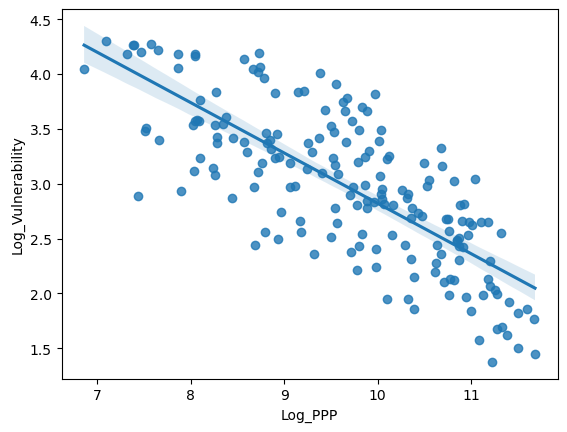

In [289]:
X = ols_data["Log_PPP"]

fitted_values = model.predict(X)
residuals = model.resid
sns.regplot(x = "Log_PPP", y = "Log_Vulnerability", data = ols_data)

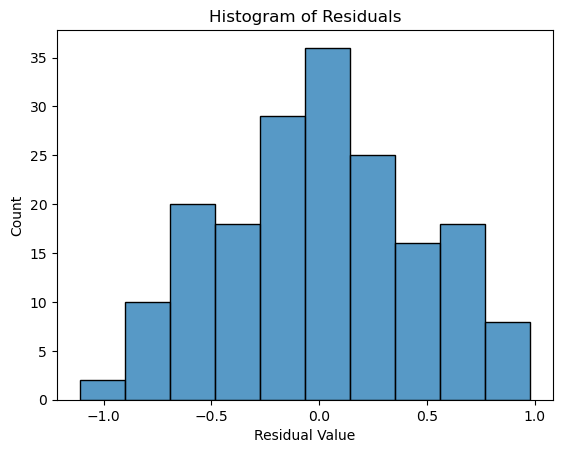

In [290]:
fig = sns.histplot(residuals) 
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show() 

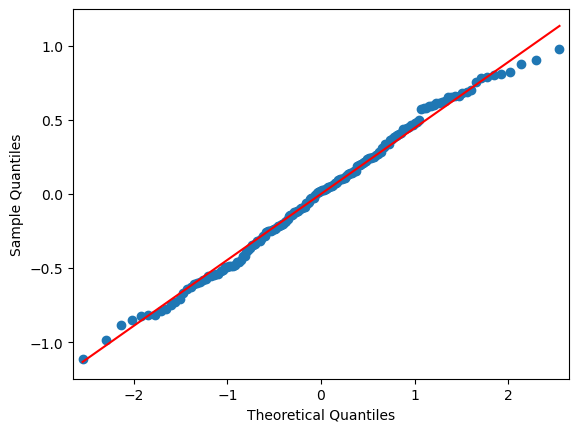

In [291]:
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

This model seems better than using all data, so let's conitnue  using wri2024 for the rest of the analysis.

### Multiple Regression 

/var/folders/yt/gz2xy7z95nv3ky_bfj5170mh0000gn/T/ipykernel_1094/1208943105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Log_WRI'] = np.log(df3['WRI'])
/var/folders/yt/gz2xy7z95nv3ky_bfj5170mh0000gn/T/ipykernel_1094/1208943105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Log_Exposure'] = np.log(df3['Exposure'])
/var/folders/yt/gz2xy7z95nv3ky_bfj5170mh0000gn/T/ipykernel_1094/1208943105.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

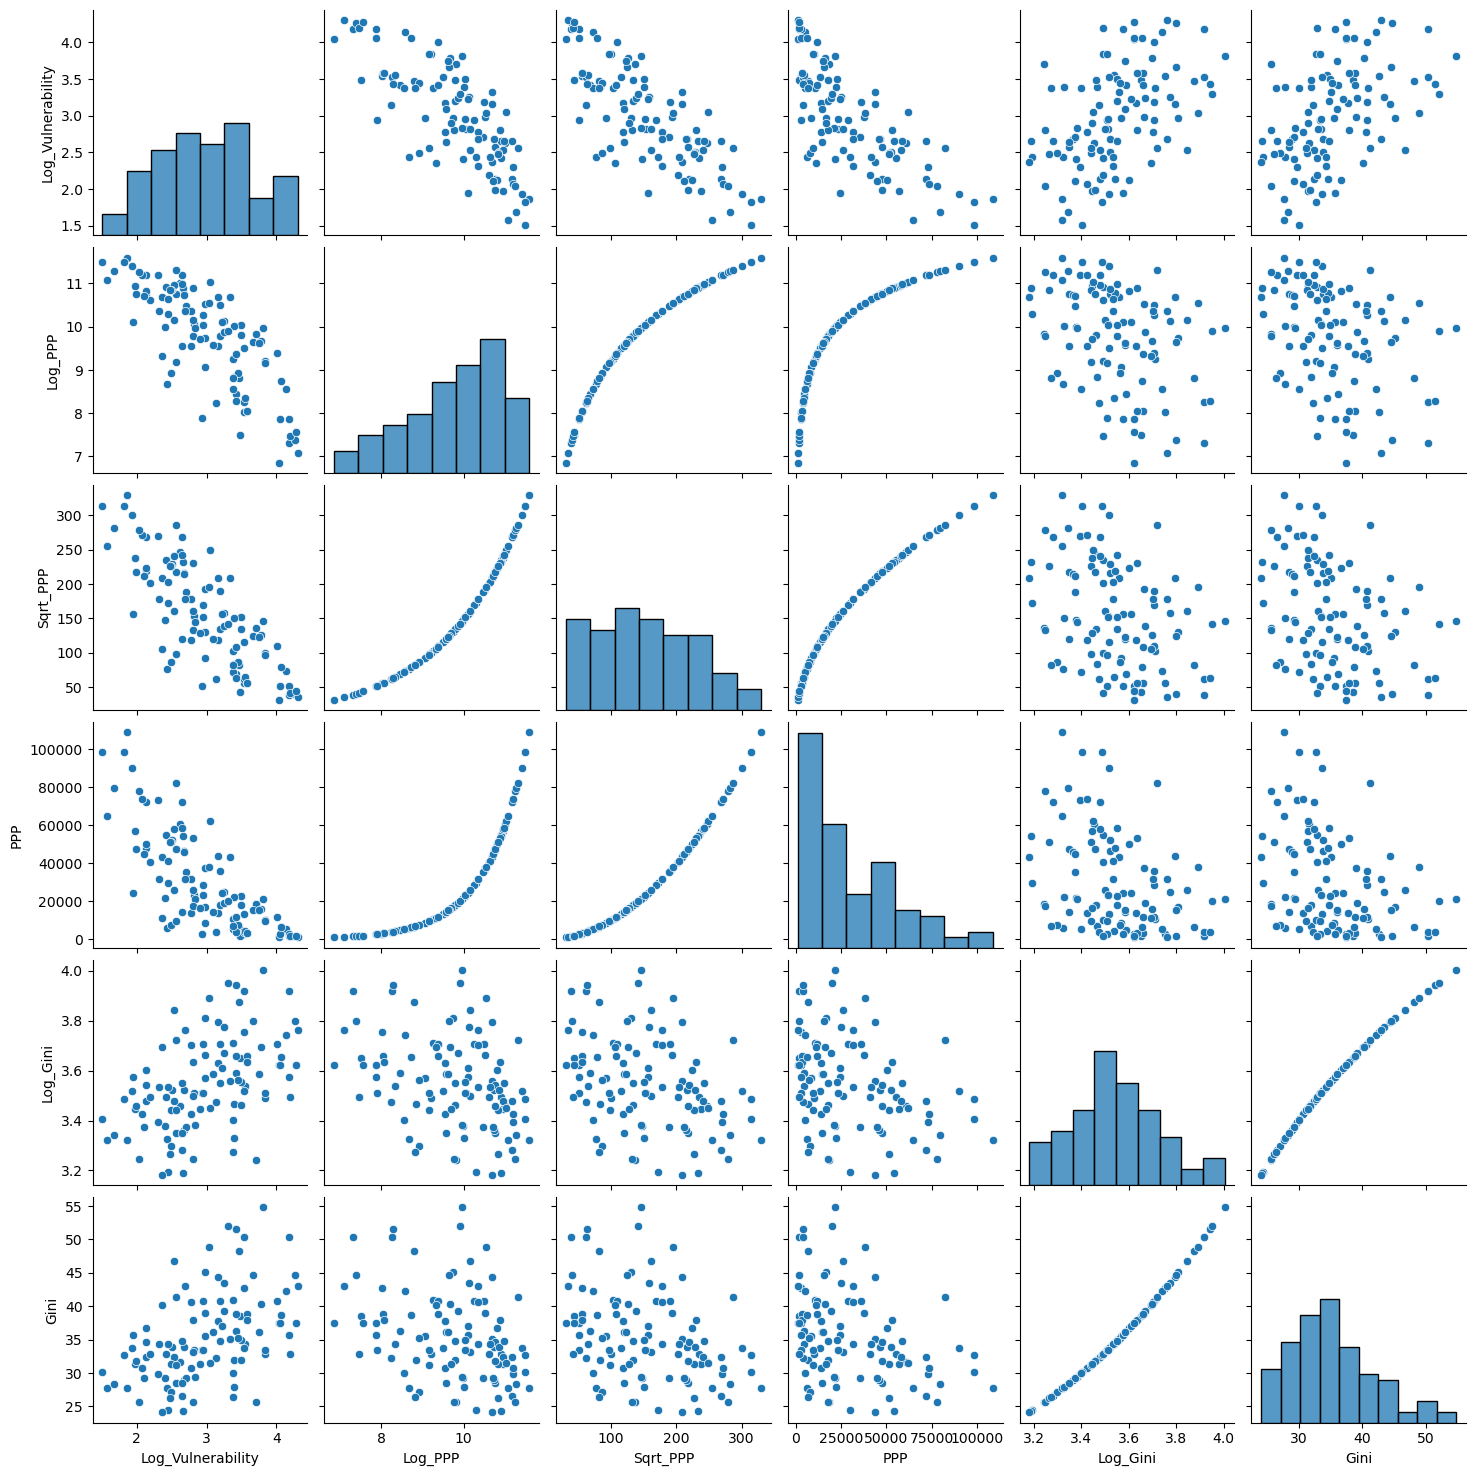

In [182]:
df3 = wri_2024_gini
#df3 = wri_2024[['WRI','Exposure', 'Vulnerability','PPP']]

df3['Log_WRI'] = np.log(df3['WRI'])
df3['Log_Exposure'] = np.log(df3['Exposure'])


df3['Log_PPP'] = np.log(df3['PPP'])
df3['Sqrt_PPP'] = np.sqrt(df3['PPP'])

df3['Log_Vulnerability'] = np.log(df3['Vulnerability'])
df3['Sqrt_Vulnerability'] = np.sqrt(df3['Vulnerability'])

df3['Log_Gini'] = np.log(df3['Gini'])


#df2 = df2[['WRI','Vulnerability', 'Susceptibility','PPP', 'Log_PPP']]
df3 = df3[[ 'Log_Vulnerability','Log_PPP','Sqrt_PPP','PPP','Log_Gini', 'Gini']]

sns.pairplot(df3)


#### Choosing the Explanatory Variables 

It looks like Log_Gini and Sqrt_PPP have the more linear relationship to Vulnerability, so we'll use them to design our multiple regression model. 

1. **Linearity:** Both Log_Gini and Sqrt_PPP have a linear relationship with Vulnerability. 
2. **(Multivariate) normality:**  The errors are normally distributed --  We will check after we have built our model, but both explanatory variables are roughly normaly distributed, so it's likely that this assumption will be satisfied. 
3. **Independent observations:** Each observation in the dataset is independent, the data are all from 2024 and collected from different countries. 
4. **Homoscedasticity:** The variation of the errors is constant or similar across the model -- Again, we will check this assumption after we've built our model. 
5. **No multicollinearity:** No two independent variables can be highly correlated with each other. From the scatterplot, it doesn't appear that Log_Gini and Sqrt_PPP have any obvious relationships. However, the Vif score below indicates that there is a moderate multicollinearity.



In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df3[['Sqrt_PPP', 'Log_Gini']]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = zip(X, vif)
print(list(vif))

[('Sqrt_PPP', 4.725224239365101), ('Log_Gini', 4.725224239365103)]


In [187]:
from sklearn.model_selection import train_test_split

X = df3[['Sqrt_PPP','Log_Gini']]
Y = df3[['Log_Vulnerability']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

ols_formula = "Log_Vulnerability ~ Sqrt_PPP + Log_Gini"
ols_data = pd.concat([X_train, y_train], axis = 1)

OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Log_Vulnerability   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     73.99
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           4.32e-18
Time:                        11:50:09   Log-Likelihood:                -32.521
No. Observations:                  74   AIC:                             71.04
Df Residuals:                      71   BIC:                             77.95
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6265      0.947     -0.661      0.510      -2.515       1.262
Sqrt_PPP      -0.0060      0.001     -9.417      0.000      -0.007      -0.005
Log_Gini       1.2671      0.258      4.911      0.000       0.753       1.782
==============================================================================
Omnibus:                        1.940   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.379   Jarque-Bera (JB):                1.884
Skew:                          -0.314   Prob(JB):                        0.390
Kurtosis:                       2.535   Cond. No.                     3.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Outlook

In the preceding analysis, we observed heightened exposure to natural disasters in certain countries across Western Africa, Oceania, and South America. We found that higher exposure often correlates with a higher World Risk Index (WRI). Additionally, the data shows a strong relationship between the Human Development Index (HDI) and WRI, highlighting that countries with lower HDI scores—often characterized by less developed infrastructure—are more vulnerable to natural disasters. This increased vulnerability makes these less developed and less prepared countries particularly susceptible to a potential rise in exposure.

Research supports these findings, revealing that many of these vulnerable countries are already experiencing severe consequences due to climate change. For example, Alhaji Musa Zakari, director of human resource management at the National Emergency Management Agency in Nigeria, notes that the frequency of natural disasters in the country is linked to climate change. This makes Nigeria's coastline more susceptible to floods, erosion, water and air pollution, all of which could significantly impact livelihoods, agriculture, infrastructure, and the environment. Another example is the South American country of Uruguay, which saw the largest number of people directly affected by climate change-related disasters in 2022, with 409,000 individuals impacted. Climate change not only intensifies the effects of natural disasters but also has the potential to affect more people over time.

Through this analysis, we have explored the relationships and patterns between WRI and the two spheres of disaster risk, exposure to natural hazards and societal capacities to respond. We also compared the WRI across countries in relation to their HDI. Recognizing the heightened risks faced by low- and middle-income countries, as well as the increased exposure in some regions potentially linked to climate change, the next steps may involve further research into the relationship between climate change and natural disasters. This could include drilling down into specific regions or countries to gain nuanced insights, making tailored recommendations, and developing models to predict and prepare for future natural disasters.

Sources:
    
https://www.un.org/africarenewal/magazine/august-2023/nigeria-prioritizes-climate-action-mitigate-natural-disasters
https://www.usgs.gov/faqs/what-are-some-signs-climate-change
https://www.statista.com/statistics/1409747/number-of-people-affected-by-climate-change-related-disasters-uruguay/
https://www.preventionweb.net/news/el-nino-disasters-governments-know-whats-coming-are-unprepared-what-must-change 
https://www.caf.com/en/currently/news/2023/11/effects-of-climate-change-in-latin-america-and-the-caribbean/

Data: 

https://data.humdata.org/dataset/worldriskindex
https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset/data
https://www.kaggle.com/datasets/sameermandal/human-development-index-2021-hdi